# Bank Data Analysis
In this project, we will use bank account dataset to build a model to predict whether a customer will be able to create an account or not. This project consists of 4 parts:
1. Data Preprocessing
2. Exploratory Data Analysis
3. Model Selection and Building
4. Model Evaluation and Testing

Here is a brief description of the dataset:
bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Preparation

In [1]:
# First, we will import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Then, we will import some useful functions in scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# After that, we can import a list of classification models that we will use in this project
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Mute the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the style of the plots
plt.style.use('ggplot')

In [4]:
# Next, we will import the dataset
dataset = pd.read_csv('bank-additional-full.csv')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Preprocessing

In [5]:
# First, we will check if there is any missing value in the dataset
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Then, we will check the data type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Next, we will check the number of unique values in each categorical columns
dataset.select_dtypes(include=['object']).nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [8]:
# We will check some summary statistics of the numerical columns
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# We will convert the target variable to 0 and 1
dataset['y'] = dataset['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Then, print the distribution of the target variable
print(dataset['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


<AxesSubplot: xlabel='y', ylabel='count'>

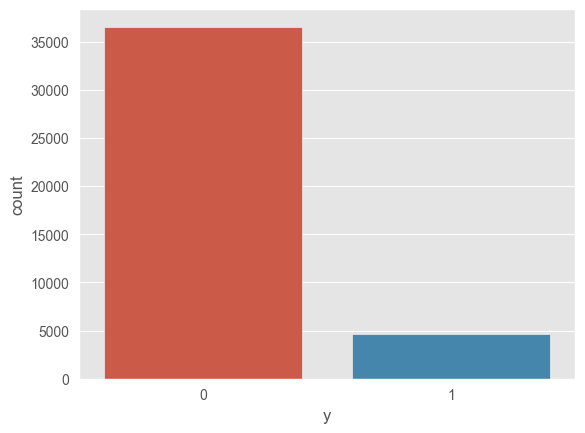

In [10]:
# We will check the distribution of the target variable
sns.countplot(dataset, x='y')

Looks like we have an unbalanced dataset. We will deal with this later.
## Exploratory Data Analysis
In this section, we will explore the relationship between the target variable and other variables.

In [11]:
# We create two list storing the names of categorical and numerical columns that will be used in our analysis, also create a list to store the names of columns that are ambiguous
cat_cols = []
num_cols = []
ambiguous_cols = []

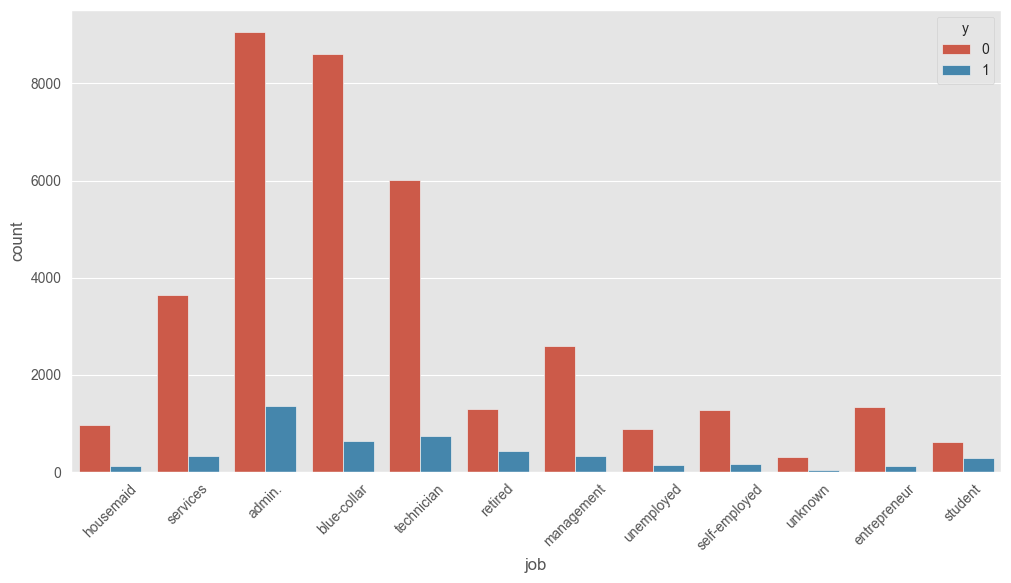

In [12]:
# First, we will check the relationship between the target variable and the job variable
# Because there are lots of unique values in the job variable, we will rotate the x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='job', hue='y')
plt.xticks(rotation=45)
plt.show()

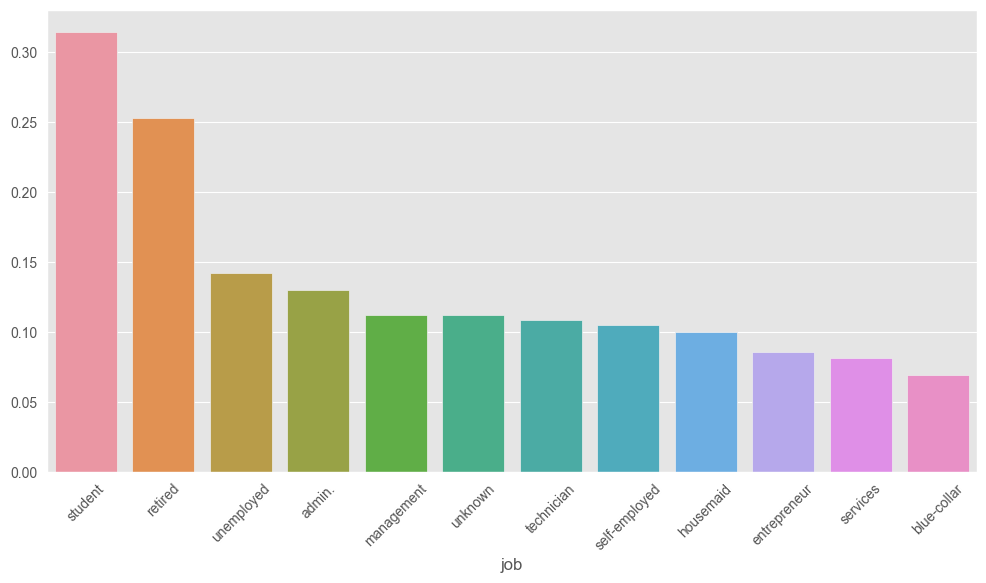

In [13]:
# Because the dataset is unbalanced, we will check the percentage of approval of each job type and plot this percentage
job_approval = dataset.groupby('job')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=job_approval.index, y=job_approval.values)
plt.xticks(rotation=45)
plt.show()

Looks like the job variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [14]:
cat_cols.append('job')

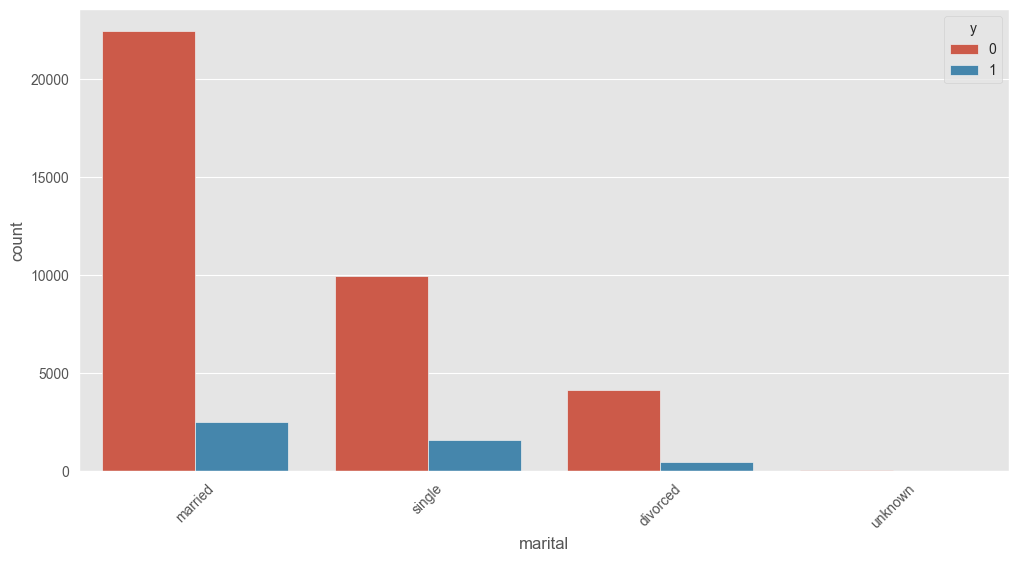

In [15]:
# Next, we will check the relationship between the target variable and the marital variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='marital', hue='y')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Looks like the value 'unknown' has very small number of observations. We will check how many observations are there in this value
dataset['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

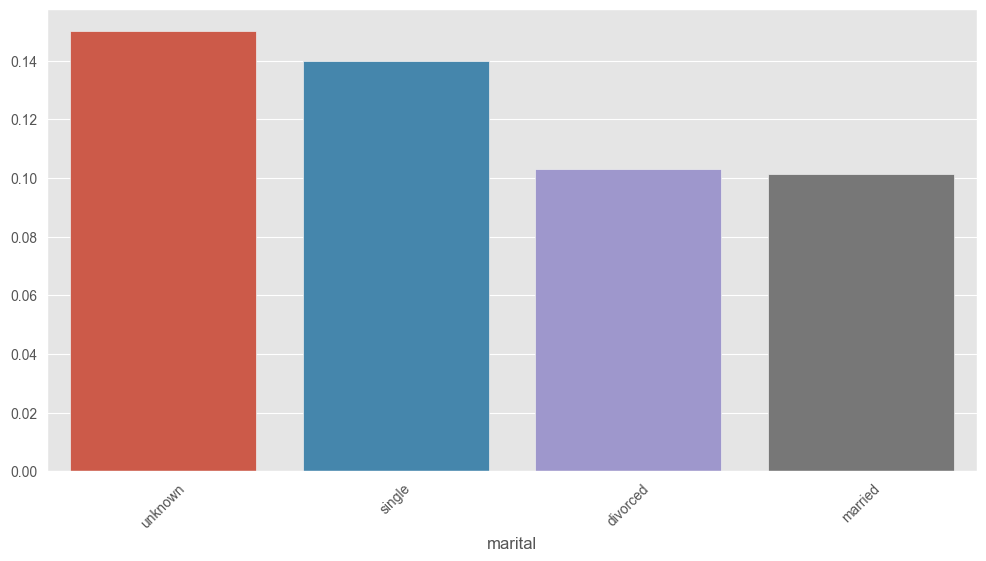

In [17]:
# We will check the percentage of approval of each marital status and plot this percentage
marital_approval = dataset.groupby('marital')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_approval.index, y=marital_approval.values)
plt.xticks(rotation=45)
plt.show()

In [18]:
# Because the number of observations in the value 'unknown' is very small, we impute this value with the value 'single'
dataset['marital_imputed'] = dataset['marital'].apply(lambda x: 'single' if x == 'unknown' else x)

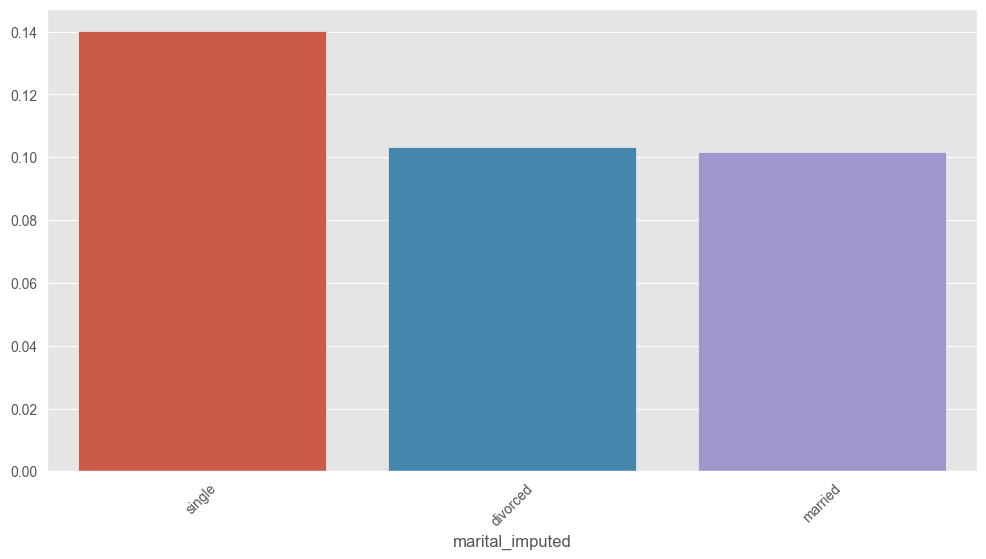

In [19]:
# Similarly, we will check the percentage of approval of each marital status and plot this percentage
marital_approval = dataset.groupby('marital_imputed')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_approval.index, y=marital_approval.values)
plt.xticks(rotation=45)
plt.show()

Looks like the marital variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [20]:
cat_cols.append('marital_imputed')

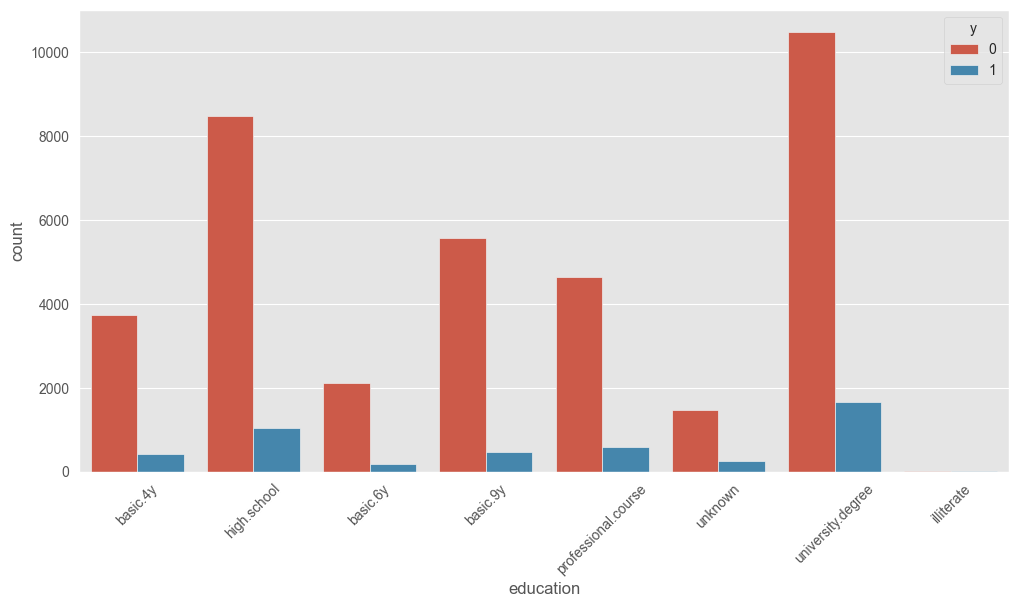

In [21]:
# Next, we will check the relationship between the target variable and the education variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='education', hue='y')
plt.xticks(rotation=45)
plt.show()

In [22]:
# We still want to check how many observations are there in each value of the education variable
dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

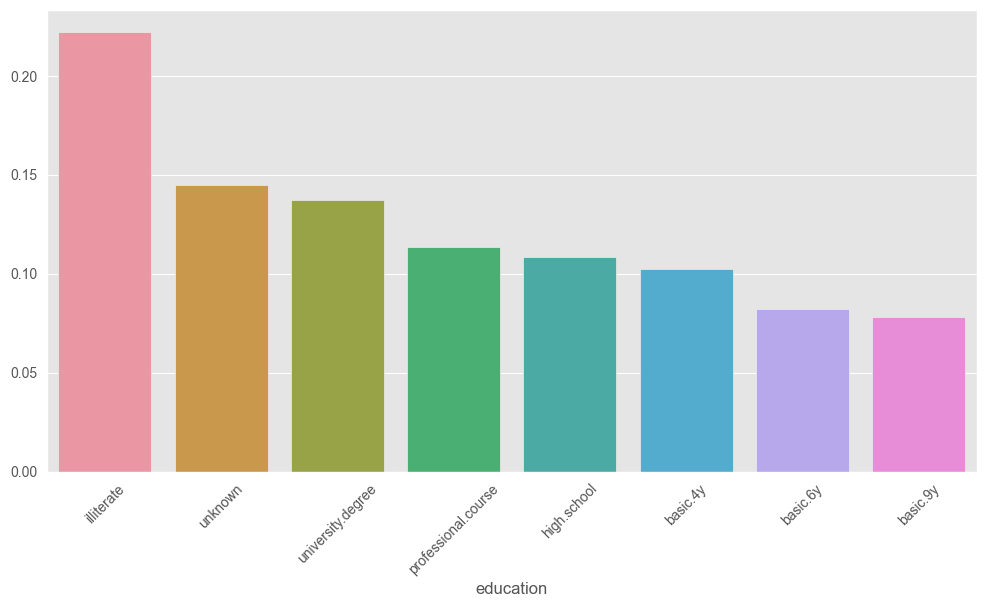

In [23]:
# Similarly, we will check the percentage of approval of each education level and plot this percentage
education_approval = dataset.groupby('education')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=education_approval.index, y=education_approval.values)
plt.xticks(rotation=45)
plt.show()

Looks like the education variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [24]:
cat_cols.append('education')

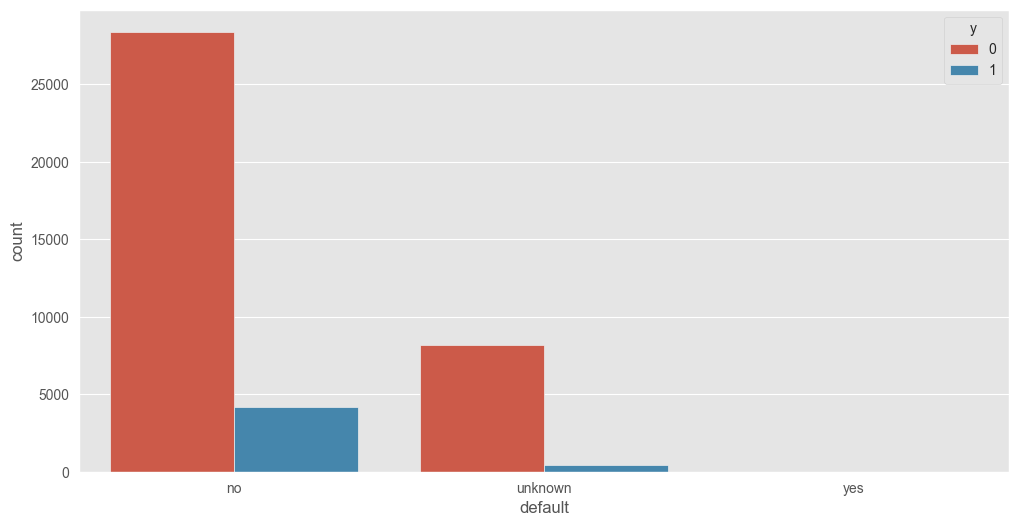

In [25]:
# Next, we will check the relationship between the target variable and the default variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='default', hue='y')
plt.show()

In [26]:
# We still want to check how many observations are there in each value of the default variable
dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [27]:
# Because the number of observations in the value 'yes' is very small, we drop these observations
dataset = dataset[dataset['default'] != 'yes']

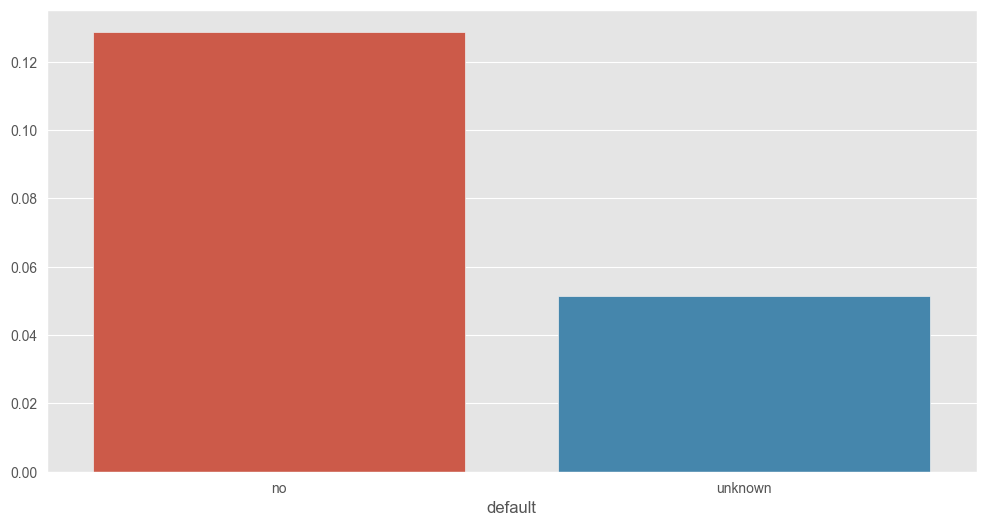

In [28]:
# Similarly, we will check the percentage of approval of each default status and plot this percentage
default_approval = dataset.groupby('default')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=default_approval.index, y=default_approval.values)
plt.show()

Looks like the default variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [29]:
cat_cols.append('default')

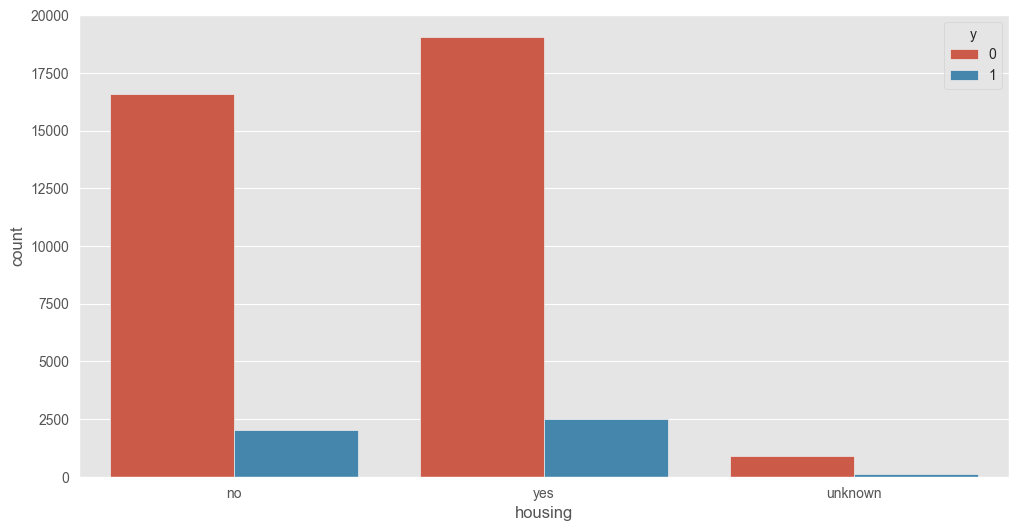

In [30]:
# Next, we will check the relationship between the target variable and the housing variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='housing', hue='y')
plt.show()

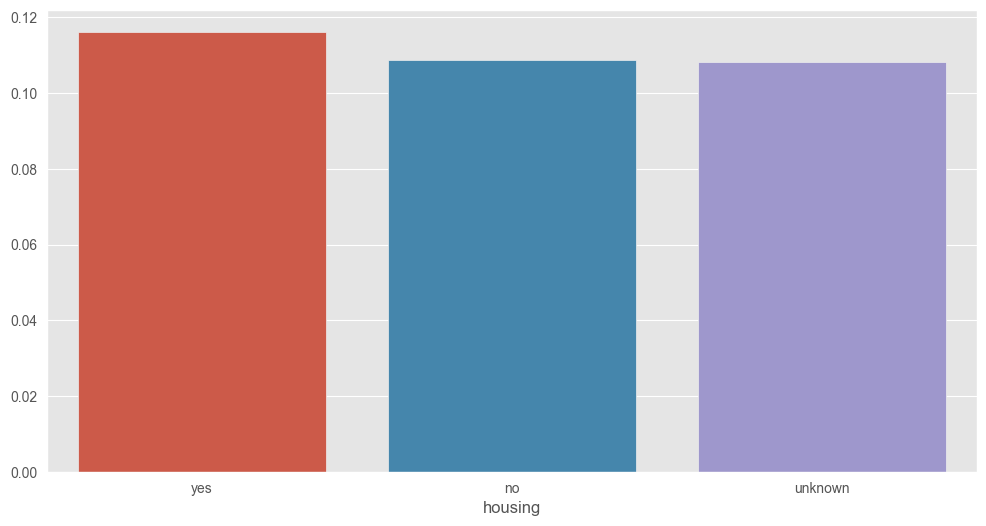

In [31]:
# Similarly, we will check the percentage of approval of each housing status and plot this percentage
housing_approval = dataset.groupby('housing')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=housing_approval.index, y=housing_approval.values)
plt.show()

Looks like the housing variable does not make much a difference. We will deal with it carefully later, add it to the ambiguous list for now.

In [32]:
ambiguous_cols.append('housing')
cat_cols.append('housing')

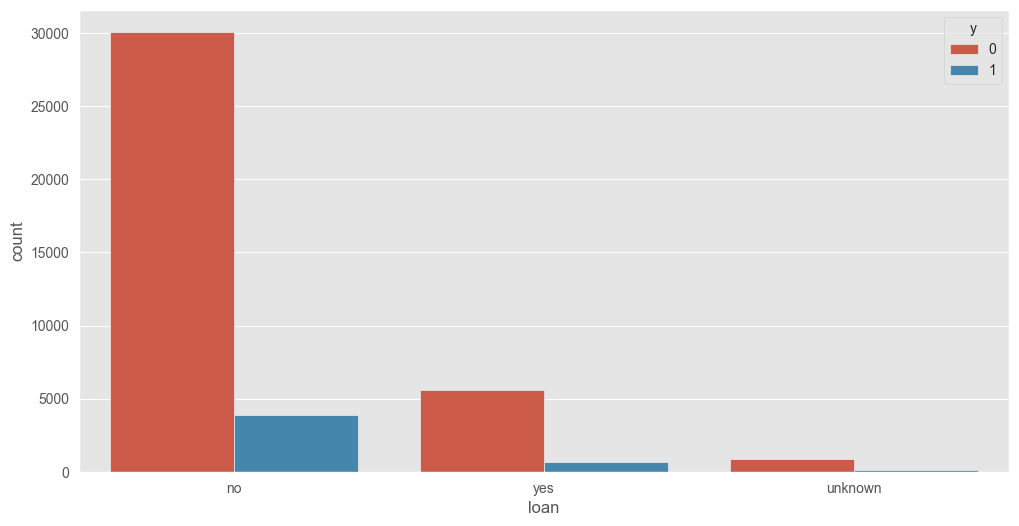

In [33]:
# Next, we will check the relationship between the target variable and the loan variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='loan', hue='y')
plt.show()

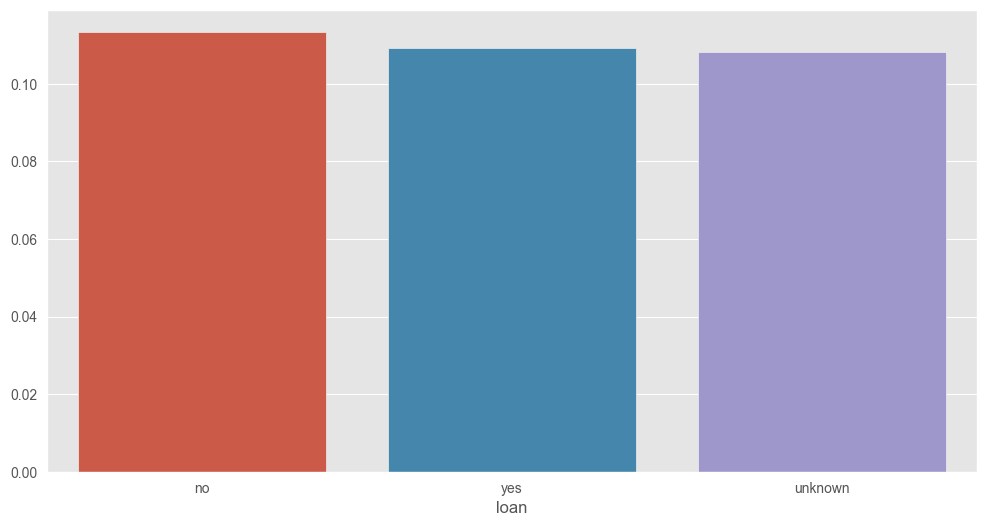

In [34]:
# Similarly, we will check the percentage of approval of each loan status and plot this percentage
loan_approval = dataset.groupby('loan')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=loan_approval.index, y=loan_approval.values)
plt.show()

Looks like the loan variable does not make much a difference. We will deal with it carefully later. Add it to the ambiguous list for now.

In [35]:
ambiguous_cols.append('loan')
cat_cols.append('loan')

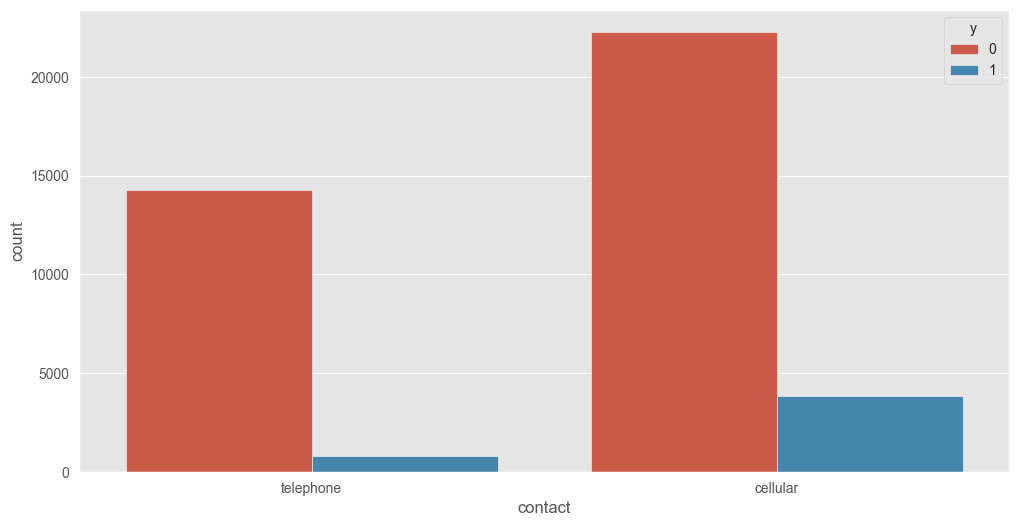

In [36]:
# Next, we will check the relationship between the target variable and the contact variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='contact', hue='y')
plt.show()

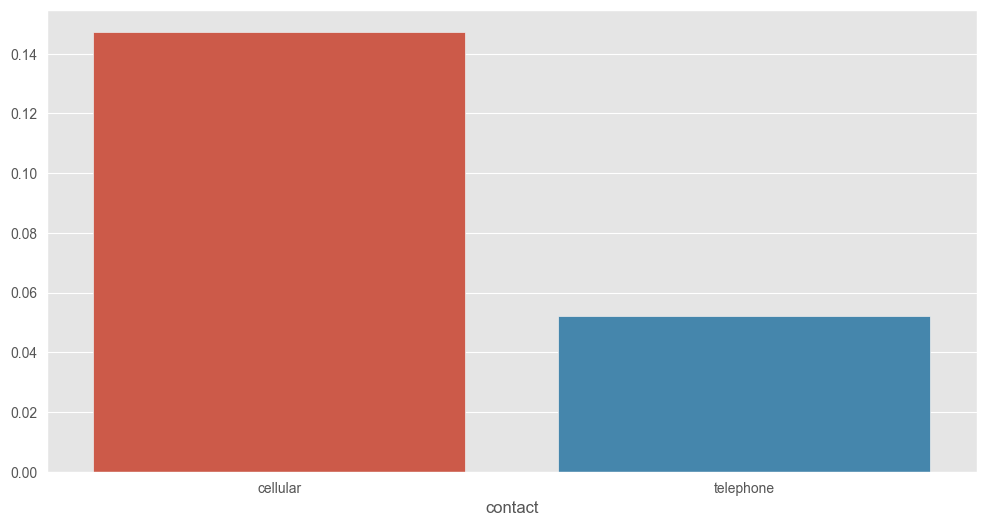

In [37]:
# Similarly, we will check the percentage of approval of each contact type and plot this percentage
contact_approval = dataset.groupby('contact')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=contact_approval.index, y=contact_approval.values)
plt.show()

Looks like the contact variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [38]:
cat_cols.append('contact')

In [39]:
# Next, we will check the relationship between the target variable and the month variable
# Because the month variable indicates a month in a year, we will convert the month variable to an integer variable
# We first create a dictionary to map the month variable to an integer variable
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Then, we map the month variable to an integer variable
dataset['month_int'] = dataset['month'].apply(lambda x: month_dict[x])

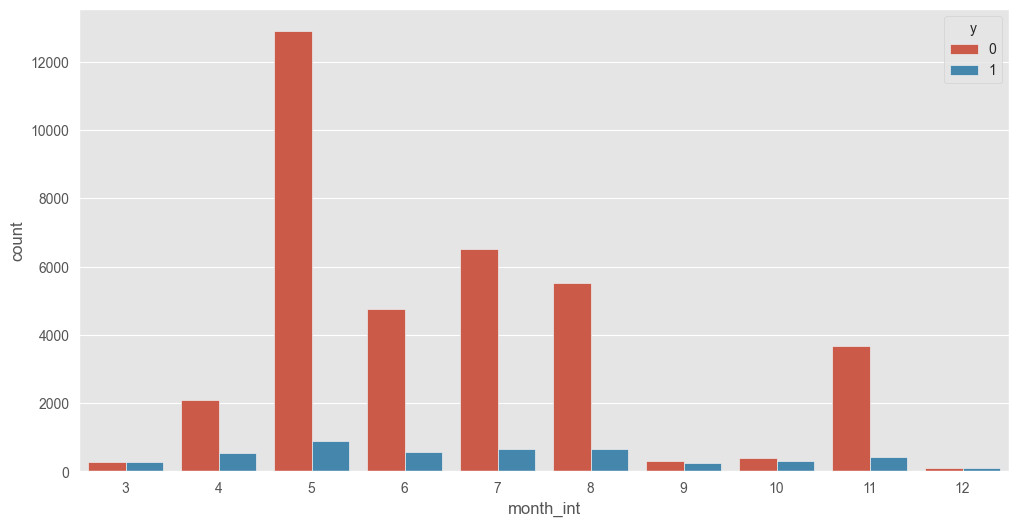

In [40]:
# Plot the month from 1 to 12 on the x-axis and the number of observations on the y-axis
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='month_int', hue='y')
plt.show()

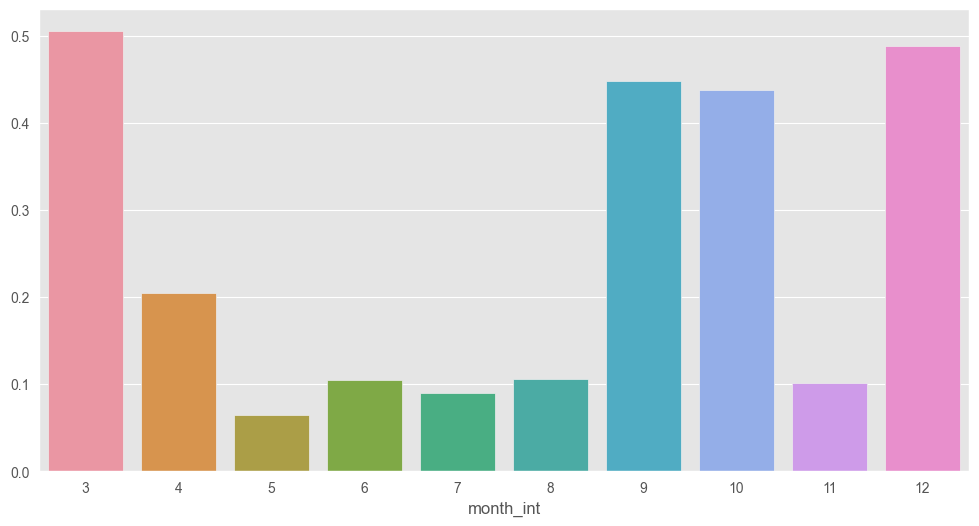

In [41]:
# Similarly, we will check the percentage of approval of each month and plot this percentage
month_approval = dataset.groupby('month_int')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=month_approval.index, y=month_approval.values)
plt.show()

Looks like the month variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [42]:
cat_cols.append('month')

In [43]:
# Next, we will check the relationship between the target variable and the day_of_week variable
# Because the day_of_week variable indicates a day in a week, we will convert the day_of_week variable to an integer variable
# We first create a dictionary to map the day_of_week variable to an integer variable
day_dict = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

# Then, we map the day_of_week variable to an integer variable
dataset['day_int'] = dataset['day_of_week'].apply(lambda x: day_dict[x])

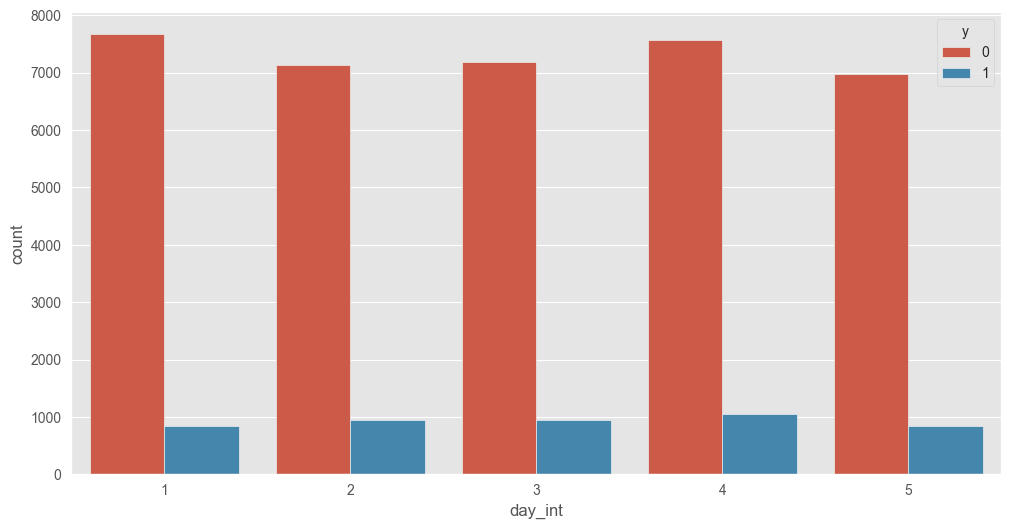

In [44]:
# Plot the day from 1 to 5 on the x-axis and the number of observations on the y-axis
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='day_int', hue='y')
plt.show()

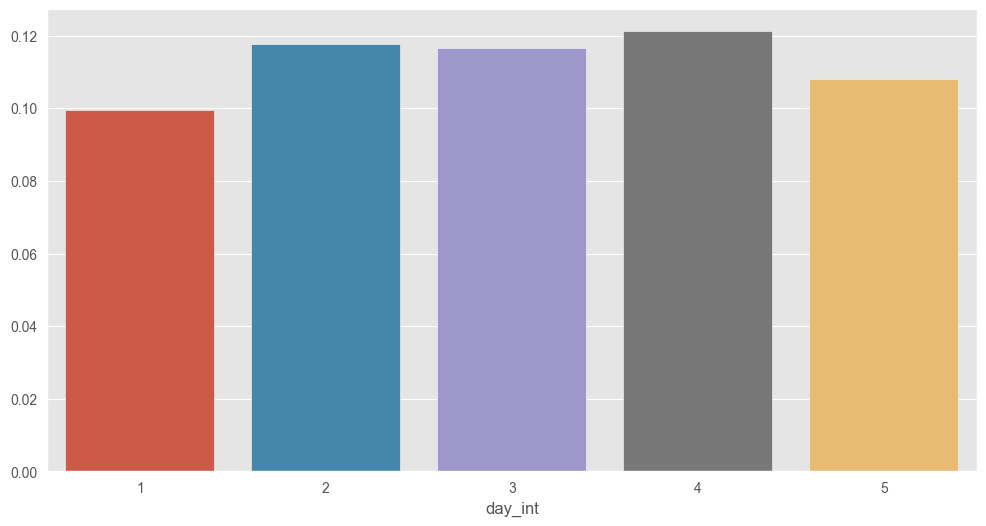

In [45]:
# Similarly, we will check the percentage of approval of each day and plot this percentage
day_approval = dataset.groupby('day_int')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=day_approval.index, y=day_approval.values)
plt.show()

Looks like the day_of_week variable does not make much a difference. We will deal with it carefully later. Add it to the ambiguous list for now.

In [46]:
ambiguous_cols.append('day_of_week')
cat_cols.append('day_of_week')

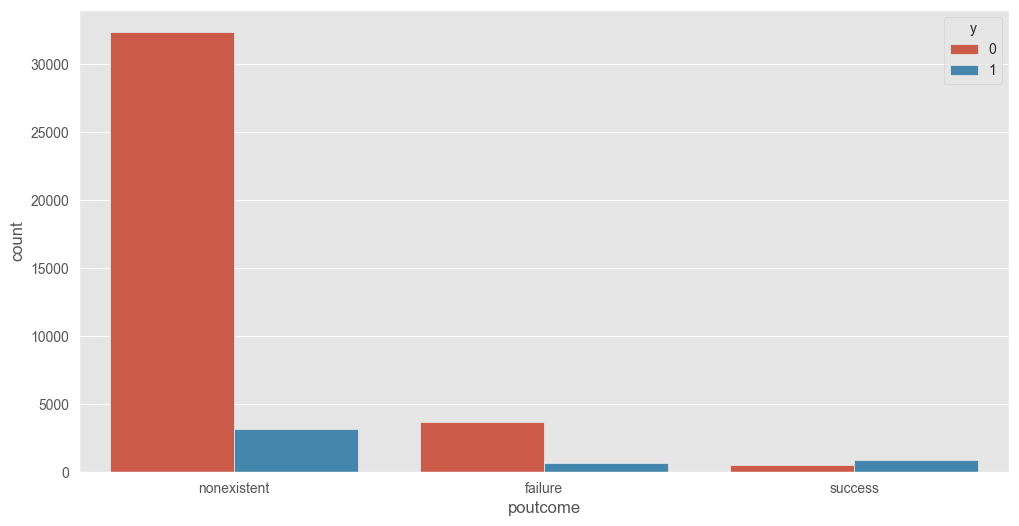

In [47]:
# Next, we will check the relationship between the target variable and the poutcome variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='poutcome', hue='y')
plt.show()

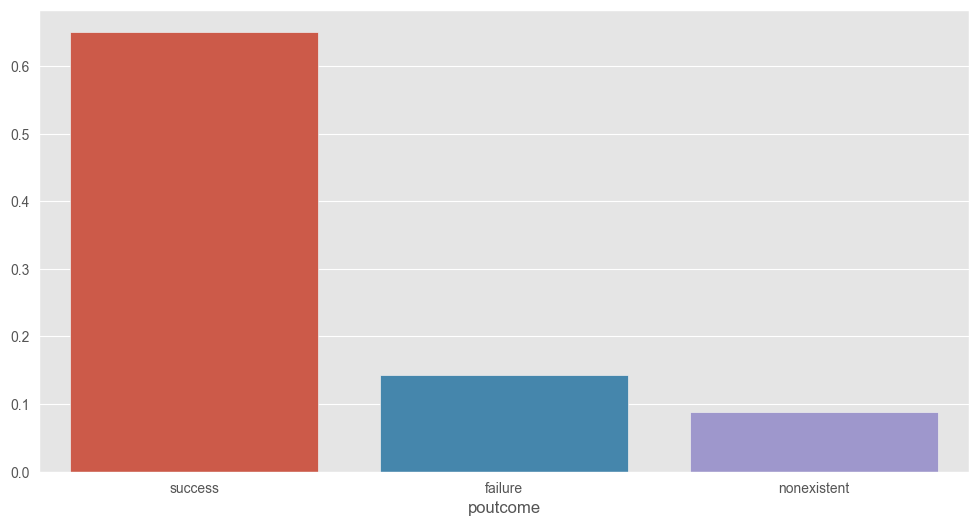

In [48]:
# Similarly, we will check the percentage of approval of each poutcome and plot this percentage
poutcome_approval = dataset.groupby('poutcome')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=poutcome_approval.index, y=poutcome_approval.values)
plt.show()

Looks like the poutcome variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [49]:
cat_cols.append('poutcome')

## Numerical Variables

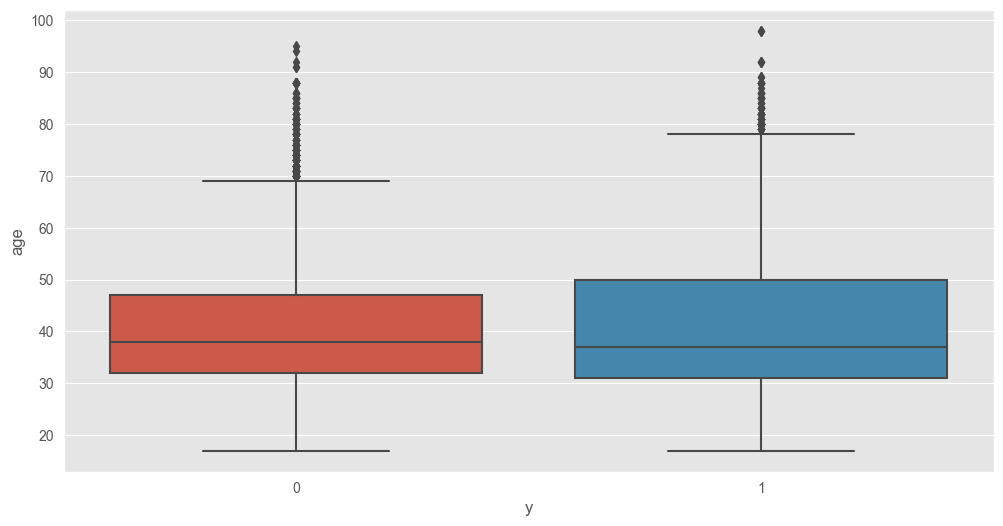

In [50]:
# We will check the relationship between the age variable and the age variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='age')
plt.show()

In [51]:
# We will calculate some statistics of the age variable group by the target variable
dataset.groupby('y')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,39.910986,9.898247,17.0,32.0,38.0,47.0,95.0
1,4640.0,40.913147,13.837476,17.0,31.0,37.0,50.0,98.0


Looks like the age variable does not make much a difference. We will deal with it carefully later. Add it to the ambiguous list for now.

In [52]:
ambiguous_cols.append('age')
num_cols.append('age')

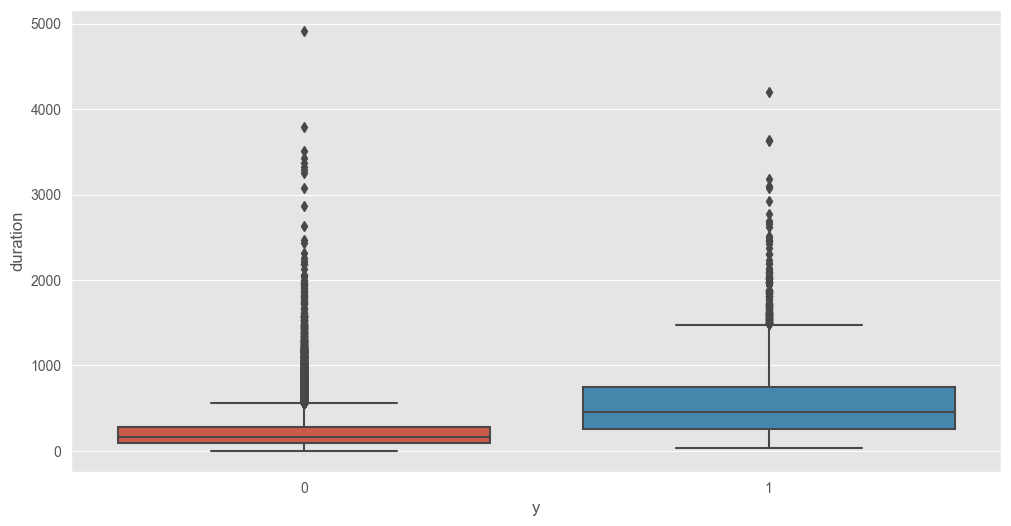

In [53]:
# Next, we will check the relationship between the duration variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='duration')
plt.show()

In [54]:
# We will calculate some statistics of the duration variable group by the target variable
dataset.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,220.854453,207.101903,0.0,95.0,164.0,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


Looks like the duration variable is a good predictor for the target variable. We will add this variable to the list of numerical variables.

In [55]:
num_cols.append('duration')

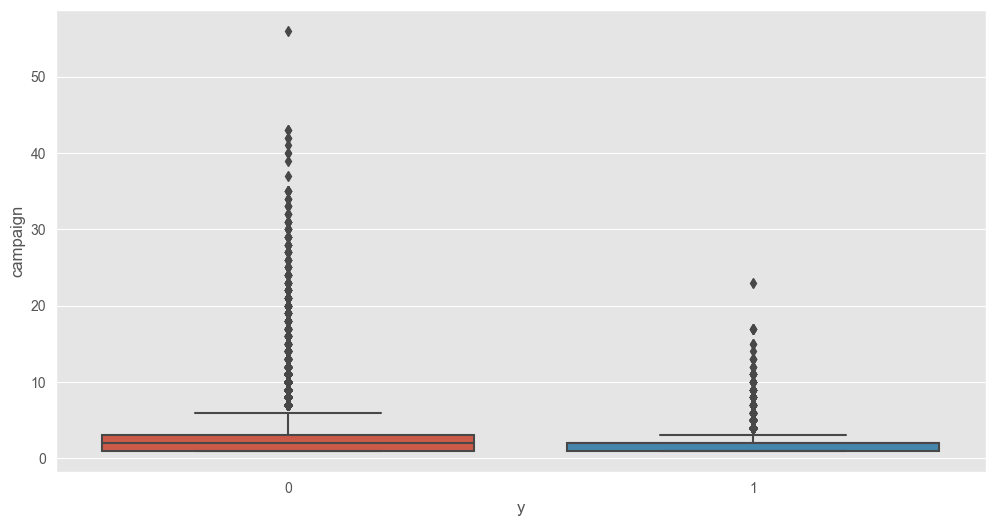

In [56]:
# Next, we will check the relationship between the campaign variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='campaign')
plt.show()

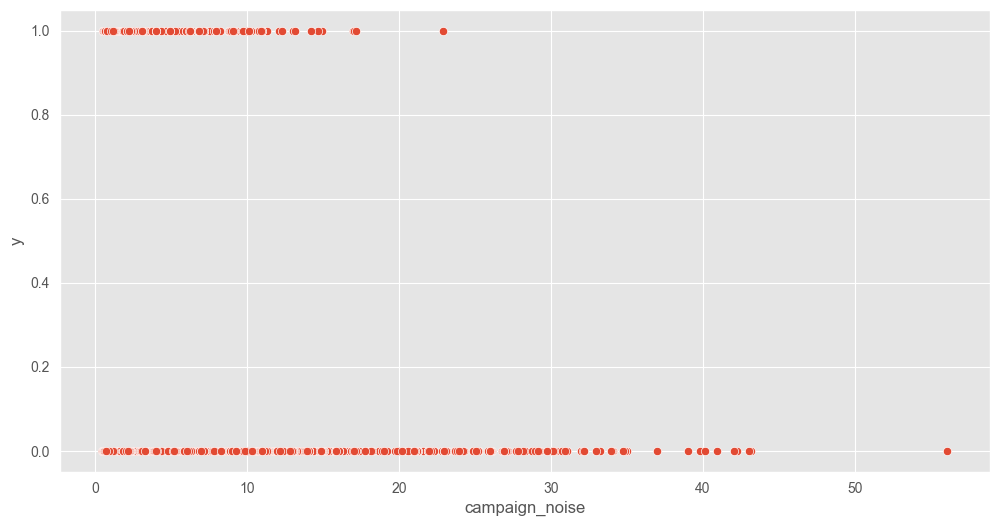

In [57]:
# We want to plot a scatterplot between the campaign variable and the target variable
# However, the campaign variable is a discrete variable, so we will add some noise to it
# We will create a new variable called campaign_noise
dataset['campaign_noise'] = dataset['campaign'].apply(lambda x: x + np.random.normal(0, 0.15))

# We will plot the scatterplot between the campaign_noise variable and the target variable
plt.figure(figsize=(12, 6))
sns.scatterplot(dataset, x='campaign_noise', y='y')
plt.show()

In [58]:
# We will calculate some statistics of the campaign variable group by the target variable
dataset.groupby('y')['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,2.633192,2.873529,1.0,1.0,2.0,3.0,56.0
1,4640.0,2.051724,1.666245,1.0,1.0,2.0,2.0,23.0


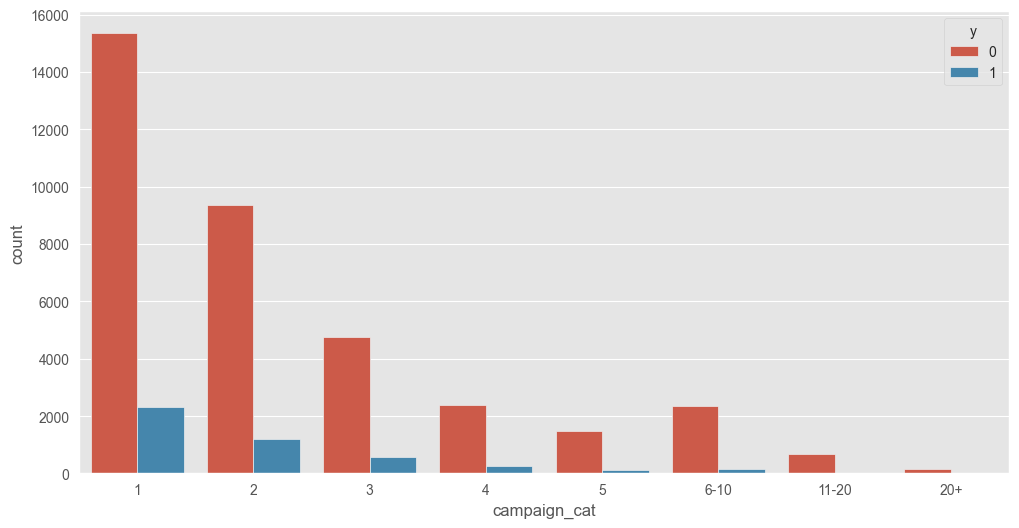

In [59]:
# We will find a way to transform the campaign variable into a categorical variable, we will put every value under 3 into a category, values from 3 to 5 into another category, values from 5 to 10 into another category, values from 10 to 20 into another category, and values above 20 into another category
# We will create a new variable called campaign_cat
dataset['campaign_cat'] = dataset['campaign'].apply(lambda x: '1' if x == 1 else '2' if x == 2 else '3' if x == 3 else '4' if x == 4 else '5' if x == 5 else '6-10' if x <= 10 else '11-20' if x <= 20 else '20+')

# We can plot the campaign_cat variable and the target variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='campaign_cat', hue='y')
plt.show()

In [60]:
# # Because the majority of this variable is under 3, we can find a way to transform it into a categorical variable
# # We will create a new variable called campaign_cat
# dataset['campaign_cat'] = dataset['campaign'].apply(lambda x: '1' if x == 1 else '2' if x == 2 else '3' if x == 3 else '4+')
#
# # We can plot the campaign_cat variable and the target variable
# plt.figure(figsize=(12, 6))
# sns.countplot(dataset, x='campaign_cat', hue='y')
# plt.show()


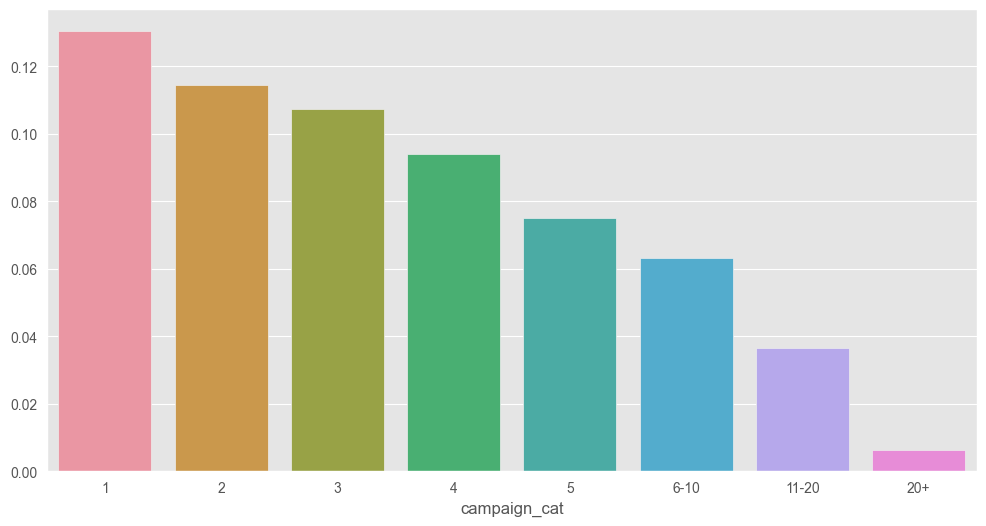

In [61]:
# We will check the percentage of approval of each campaign_cat and plot this percentage
campaign_cat_approval = dataset.groupby('campaign_cat')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_cat_approval.index, y=campaign_cat_approval.values)
plt.show()

Looks like the campaign_cat variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [62]:
cat_cols.append('campaign_cat')

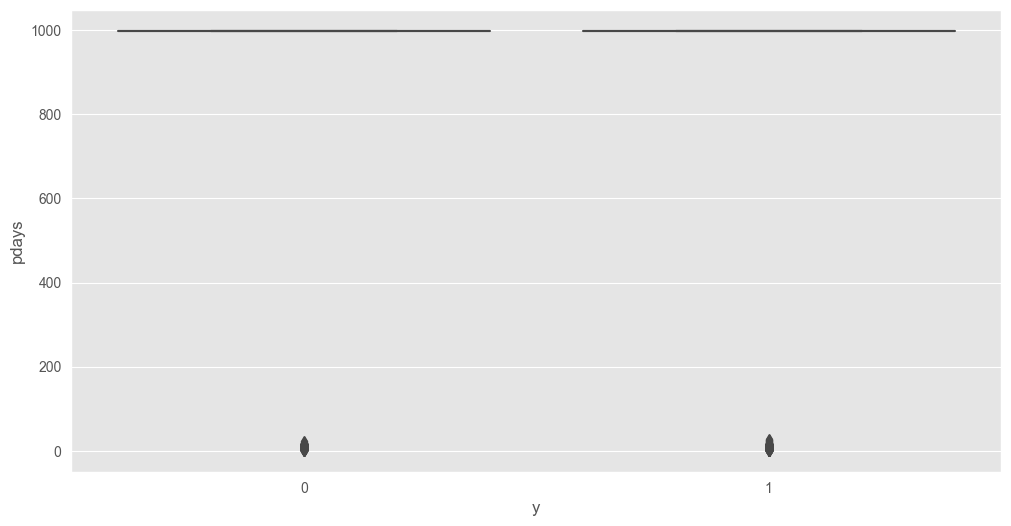

In [63]:
# Next, we will check the relationship between the pdays variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='pdays')
plt.show()

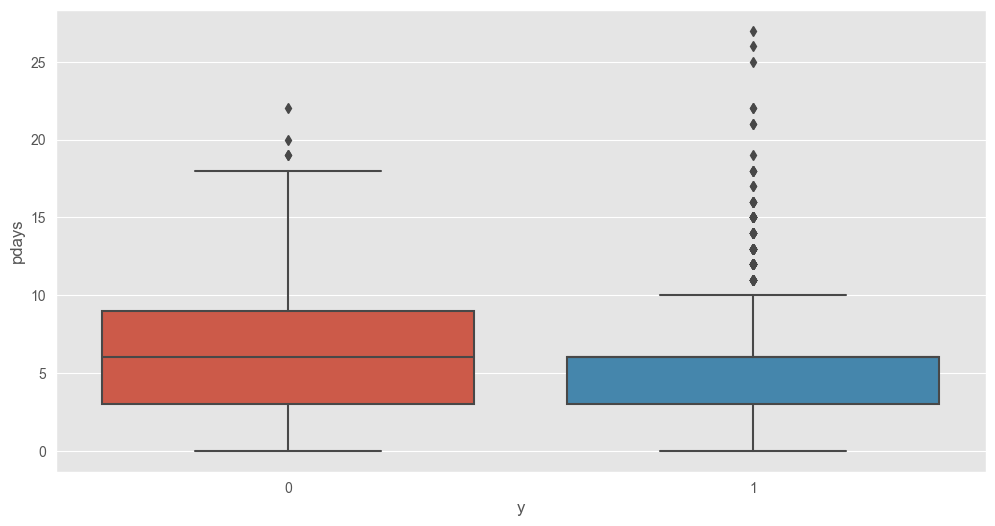

In [64]:
# Because '999' means the client was not previously contacted, we replot this figure without '999'
plt.figure(figsize=(12, 6))
sns.boxplot(dataset[dataset['pdays'] != 999], x='y', y='pdays')
plt.show()

In [69]:
# We will calculate some statistics of the pdays variable group by the target variable without '999'
dataset[dataset['pdays'] != 999].groupby('y')['pdays'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,548.0,6.193431,3.987525,0.0,3.0,6.0,9.0,22.0
1,967.0,5.913133,3.727896,0.0,3.0,6.0,6.0,27.0


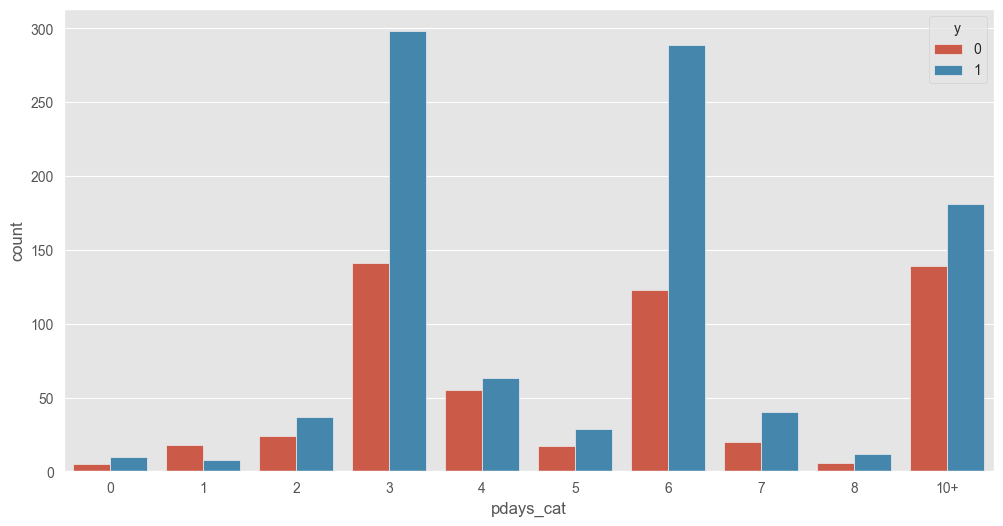

In [72]:
# We can create a new variable called pdays_cat, where everything less than 9 is kept as its original value, and everything greater than 9 but not '999' is converted to '10+', and '999' is converted to 'never contacted'
dataset['pdays_cat'] = dataset['pdays'].apply(lambda x: str(x) if x < 9 else '10+' if x < 999 else 'never contacted')

# We can plot the pdays_cat variable and the target variable, without '999', and in order from '0' to '10+'
plt.figure(figsize=(12, 6))
sns.countplot(dataset[dataset['pdays'] != 999], x='pdays_cat', hue='y', order=['0', '1', '2', '3', '4', '5', '6', '7', '8', '10+'])
plt.show()

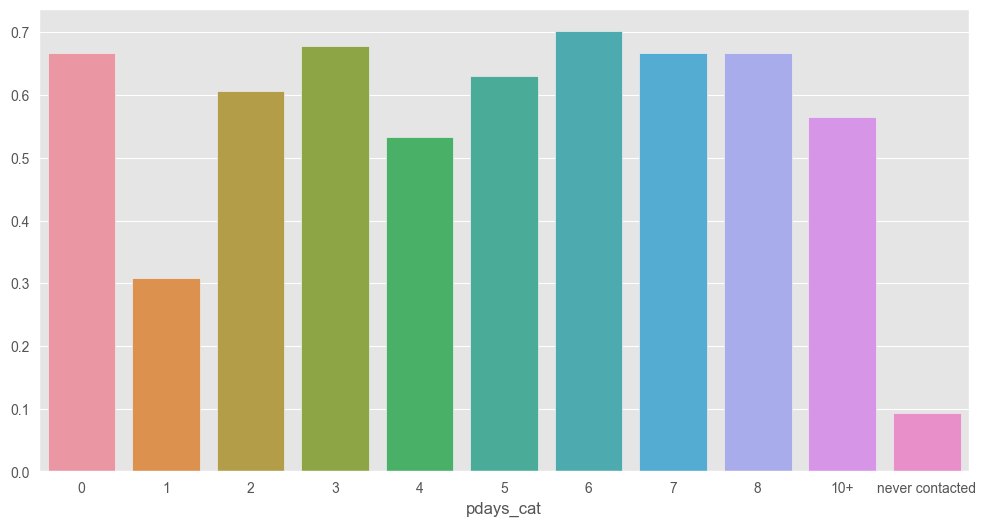

In [330]:
# We will check the percentage of approval of each pdays_cat and plot this percentage, and in order from '0' to '10+'
pdays_cat_approval = dataset.groupby('pdays_cat')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=pdays_cat_approval.index, y=pdays_cat_approval.values, order=['0', '1', '2', '3', '4', '5', '6', '7', '8', '10+', 'never contacted'])
plt.show()

Looks like the pdays_cat variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [331]:
cat_cols.append('pdays_cat')

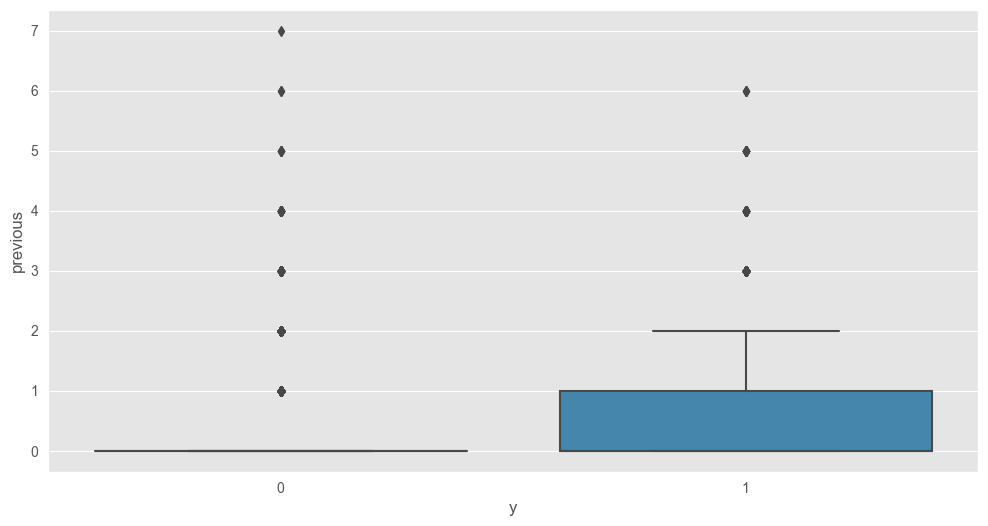

In [332]:
# Next, we will check the relationship between the previous variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='previous')
plt.show()

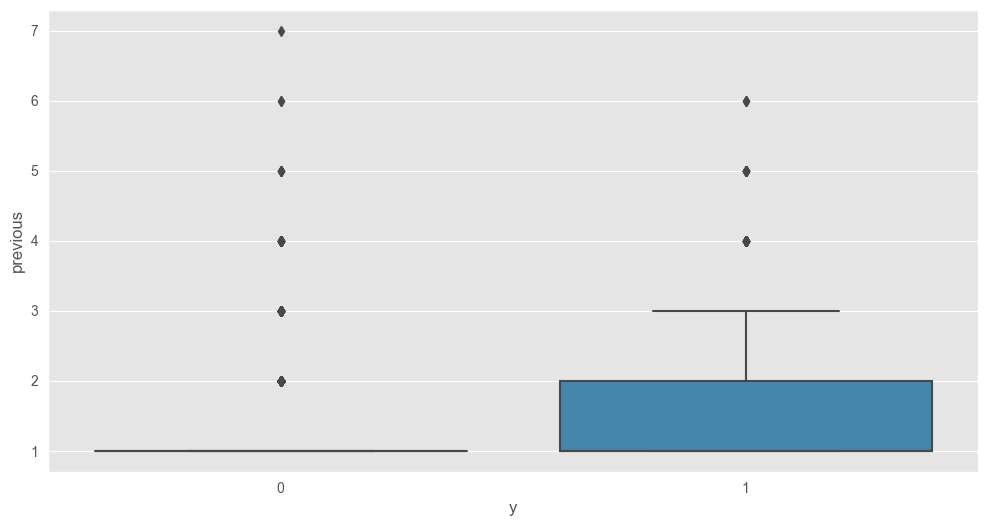

In [333]:
# Because the majority of this variable is 0, meaning the client was not previously contacted, we replot this figure without 0
plt.figure(figsize=(12, 6))
sns.boxplot(dataset[dataset['previous'] != 0], x='y', y='previous')
plt.show()

In [334]:
# We will calculate some statistics of the previous variable group by the target variable, without 0
dataset[dataset['previous'] != 0].groupby('y')['previous'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,4125.0,1.172606,0.513424,1.0,1.0,1.0,1.0,7.0
1,1499.0,1.525017,0.846658,1.0,1.0,1.0,2.0,6.0


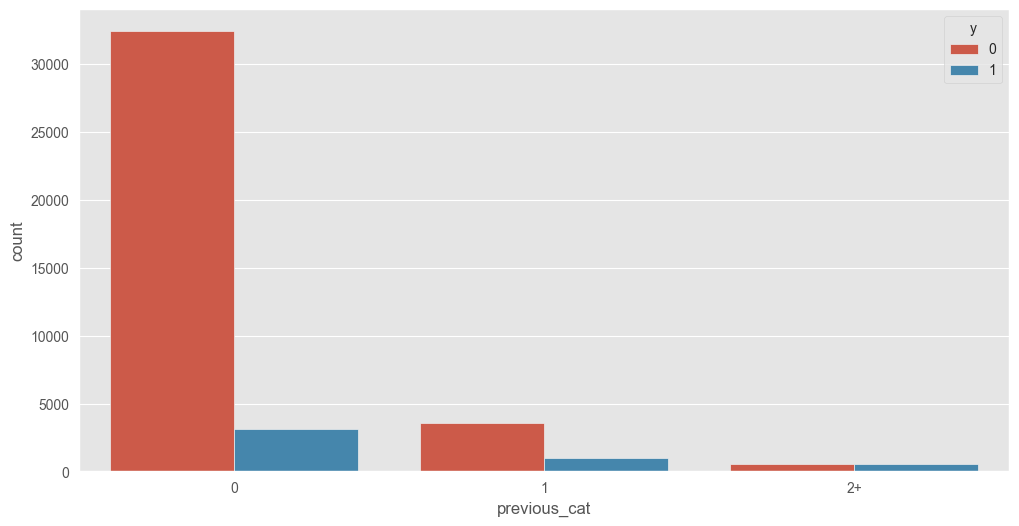

In [335]:
# Because the majority of this variable is 0, meaning the client was not previously contacted, we can find a way to transform it into a categorical variable
# We will create a new variable called previous_cat, where everything less than 2 is kept as its original value, and everything greater than 2 is converted to '2+'
dataset['previous_cat'] = dataset['previous'].apply(lambda x: str(x) if x < 2 else '2+')

# We can plot the previous_cat variable and the target variable
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='previous_cat', hue='y')
plt.show()

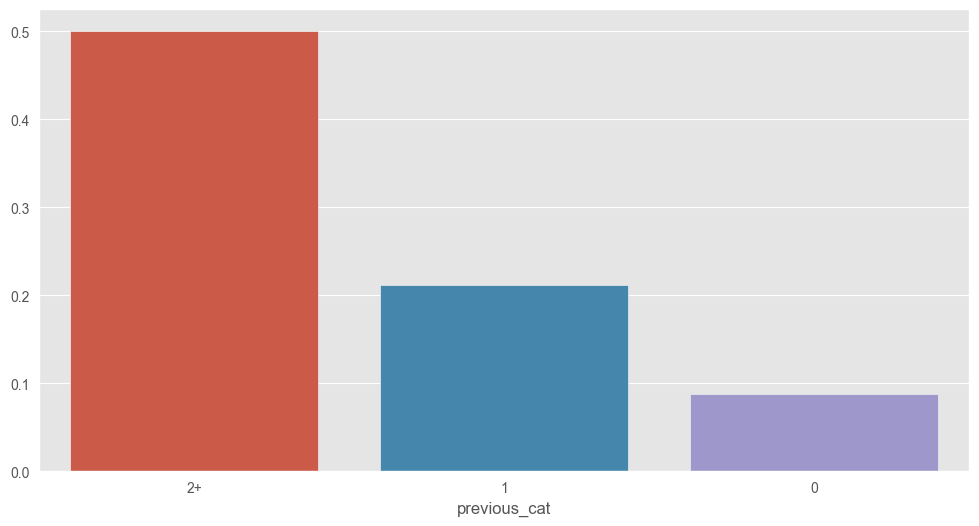

In [336]:
# We will check the percentage of approval of each previous_cat and plot this percentage
previous_cat_approval = dataset.groupby('previous_cat')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=previous_cat_approval.index, y=previous_cat_approval.values)
plt.show()

Looks like the previous_cat variable is a good predictor for the target variable. We will add this variable to the list of categorical variables.

In [337]:
cat_cols.append('previous_cat')

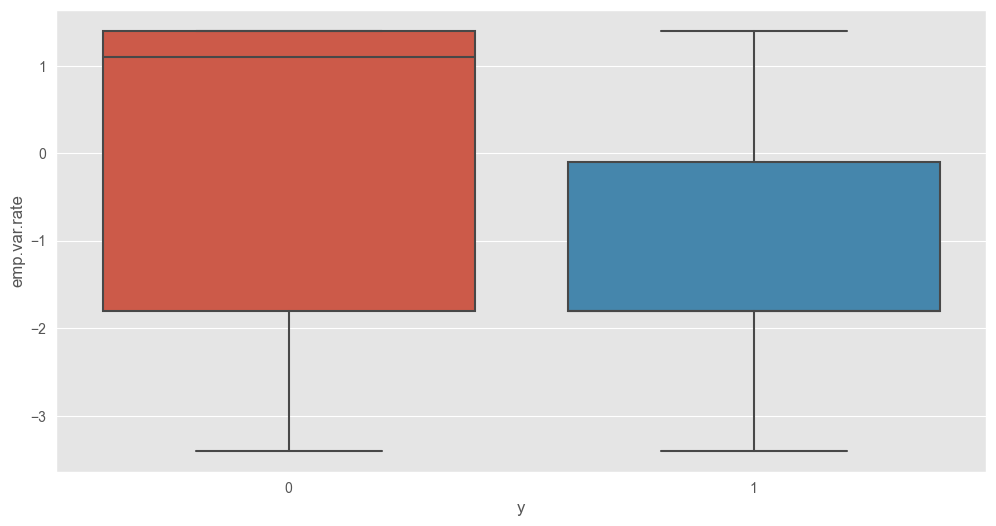

In [338]:
# Next, we will check the relationship between the emp.var.rate variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='emp.var.rate')
plt.show()

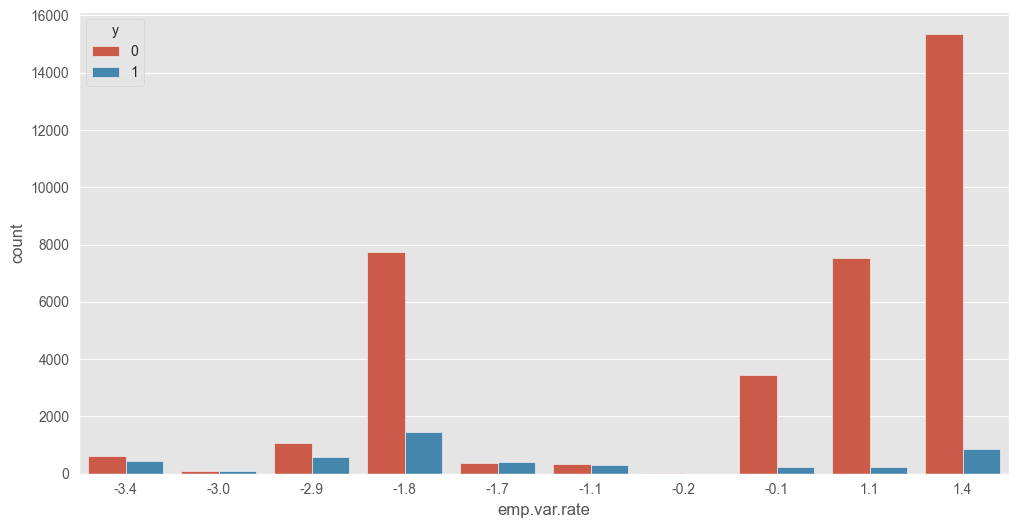

In [339]:
# Because this variable only has 10 values, we can plot it using barchart
plt.figure(figsize=(12, 6))
sns.countplot(dataset, x='emp.var.rate', hue='y')
plt.show()

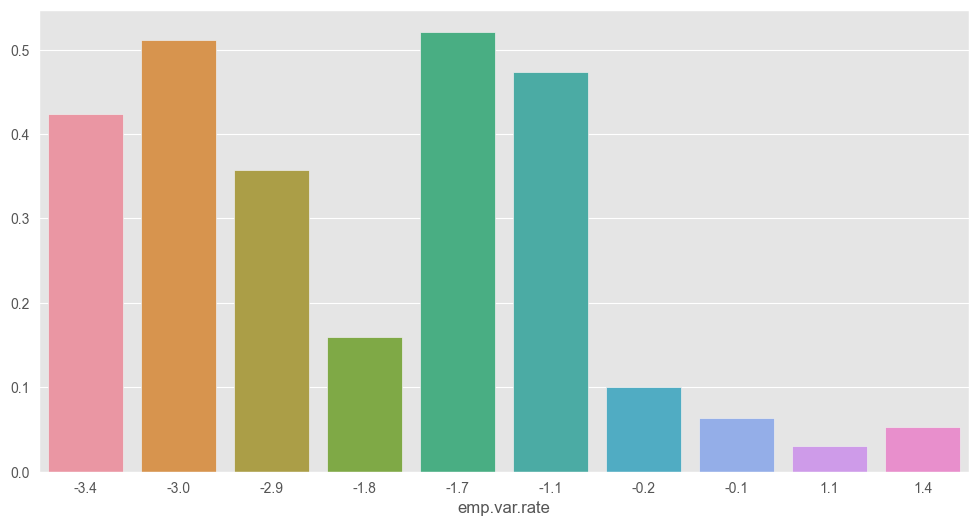

In [340]:
# We can calculate the approval rate of each value of this variable, and plot it
emp_var_rate_approval = dataset.groupby('emp.var.rate')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=emp_var_rate_approval.index, y=emp_var_rate_approval.values)
plt.show()

We don't see a relationship between the emp.var.rate value and the approval rate, the plot only shows the relation between the month and the target variable. We will drop this variable.

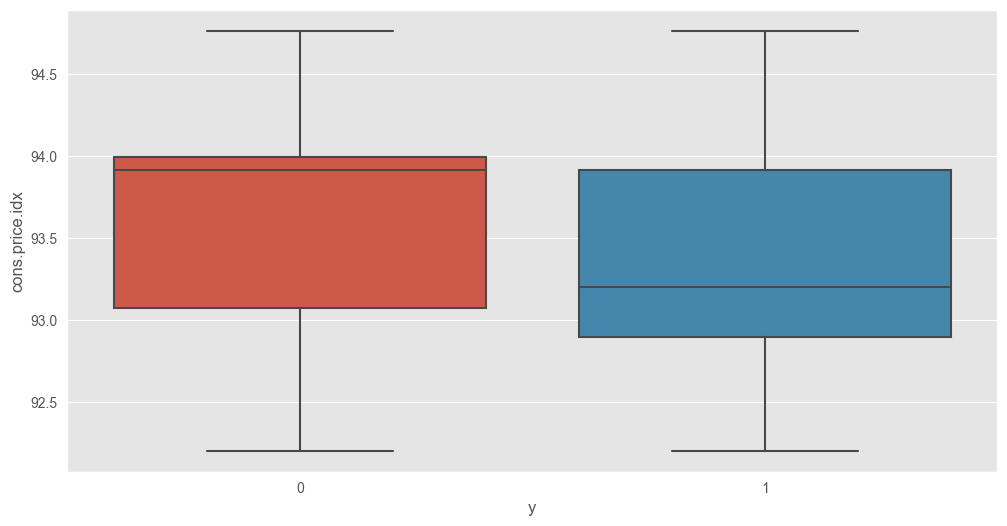

In [341]:
# Next, we will check the relationship between the cons.price.idx variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='cons.price.idx')
plt.show()

In [342]:
# We will calculate some statistics of the cons.price.idx variable group by the target variable
dataset.groupby('y')['cons.price.idx'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,93.603777,0.559011,92.201,93.075,93.918,93.994,94.767
1,4640.0,93.354386,0.676644,92.201,92.893,93.200,93.918,94.767


We don't see a relationship between the cons.price.idx value and the target variable. We will drop this variable.

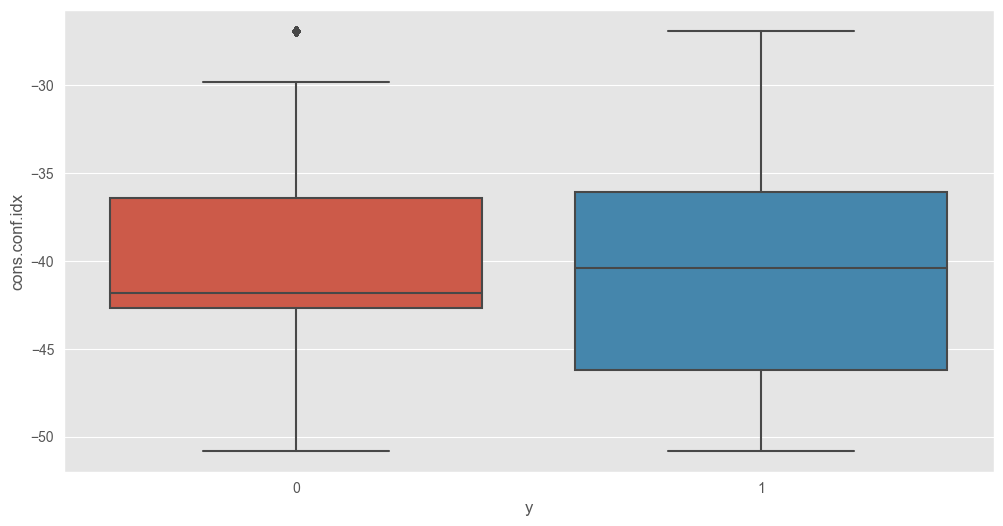

In [343]:
# Next, we will check the relationship between the cons.conf.idx variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='cons.conf.idx')
plt.show()

In [344]:
# We will calculate some statistics of the cons.conf.idx variable group by the target variable
dataset.groupby('y')['cons.conf.idx'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,-40.593304,4.391203,-50.8,-42.7,-41.8,-36.4,-26.9
1,4640.0,-39.789784,6.139668,-50.8,-46.2,-40.4,-36.1,-26.9


We don't see a relationship between the cons.conf.idx value and the target variable. We will drop this variable.

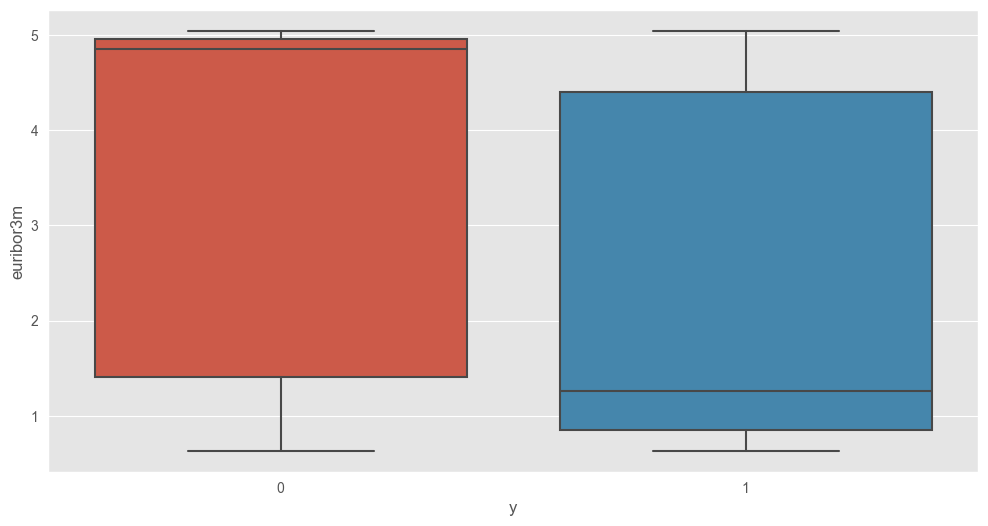

In [345]:
# Next, we will check the relationship between the euribor3m variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='euribor3m')
plt.show()

In [346]:
# We will calculate some statistics of the euribor3m variable group by the target variable
dataset.groupby('y')['euribor3m'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,3.811419,1.638232,0.634,1.405,4.857,4.962,5.045
1,4640.0,2.123135,1.742598,0.634,0.849,1.266,4.406,5.045


This variable is a fair predictor of the target variable. We can add it to the list of numerical variables.

In [347]:
num_cols.append('euribor3m')

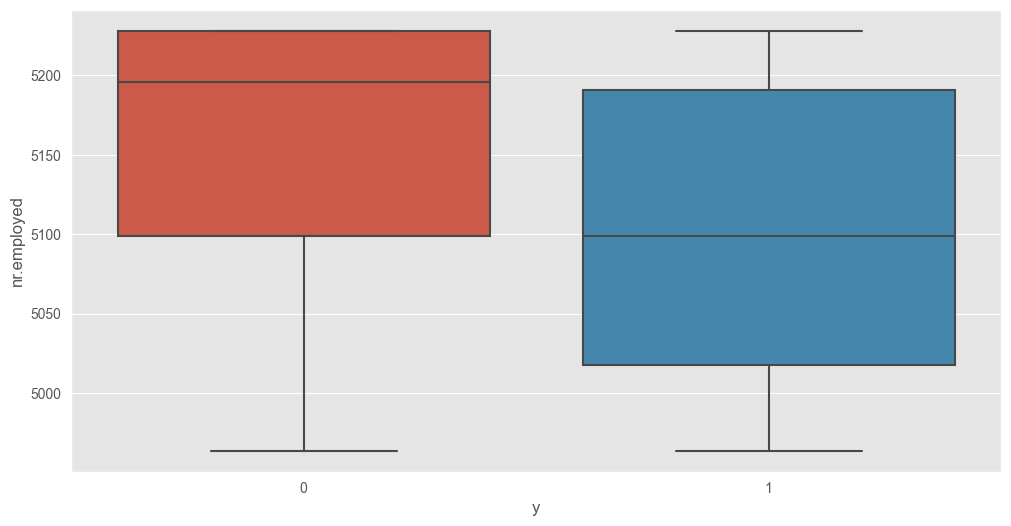

In [348]:
# Next, we will check the relationship between the nr.employed variable and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset, x='y', y='nr.employed')
plt.show()

In [349]:
# We will calculate some statistics of the nr.employed variable group by the target variable
dataset.groupby('y')['nr.employed'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,5176.163221,64.573405,4963.6,5099.1,5195.8,5228.1,5228.1
1,4640.0,5095.115991,87.572641,4963.6,5017.5,5099.1,5191.0,5228.1


In [350]:
# We can try to standardize this variable and calculate some statistics of the standardized nr.employed variable group by the target variable
dataset['nr.employed_standard'] = (dataset['nr.employed'] - dataset['nr.employed'].mean()) / dataset['nr.employed'].std()
dataset.groupby('y')['nr.employed_standard'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,36545.0,0.126375,0.893715,-2.815563,-0.940203,0.398154,0.845196,0.845196
1,4640.0,-0.995343,1.212032,-2.815563,-2.069571,-0.940203,0.331721,0.845196


This variable is a fair predictor of the target variable. We can add it to the list of numerical variables.

In [351]:
num_cols.append('nr.employed')

## Retrive the numerical and categorical datasets

In [352]:
# We will create a new dataset for numerical variables
num_dataset = dataset[num_cols]
num_dataset.head()

,age,duration,euribor3m,nr.employed
0,56,261,4.857,5191.0
1,57,149,4.857,5191.0
2,37,226,4.857,5191.0
3,40,151,4.857,5191.0
4,56,307,4.857,5191.0


In [353]:
# We will create a new dataset for categorical variables
cat_dataset = dataset[cat_cols]
cat_dataset.head()

,job,marital_imputed,education,default,housing,loan,contact,month,day_of_week,poutcome,campaign_cat,pdays_cat,previous_cat
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1,never contacted,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1,never contacted,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,1,never contacted,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,1,never contacted,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1,never contacted,0


In [354]:
ambiguous_cols

['housing', 'loan', 'day_of_week', 'age']

In [355]:
# We will create a new dataset for the target variable
target_dataset = dataset['y']

### Feature Selection

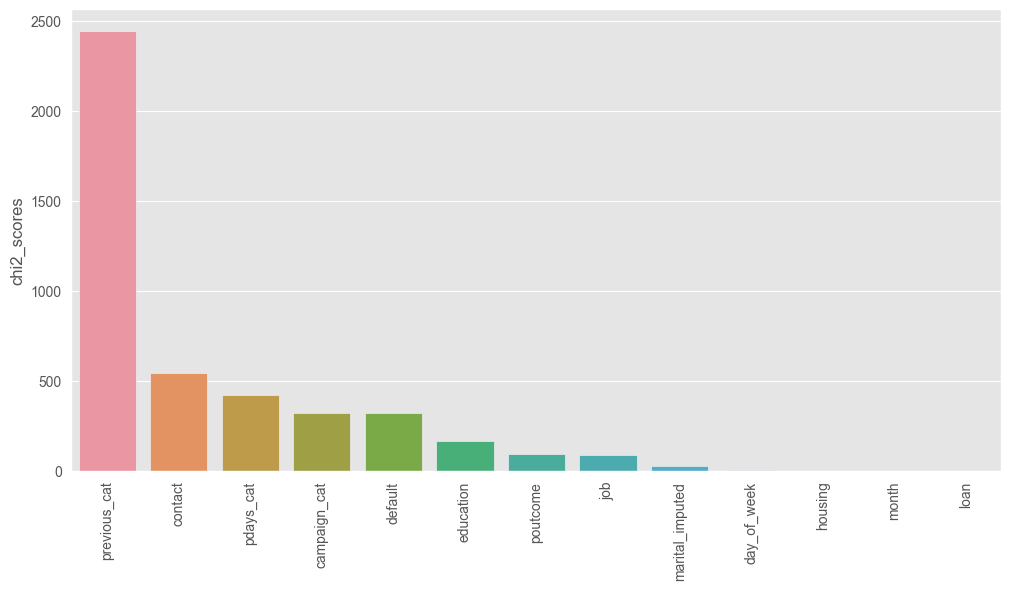

In [356]:
# First, we use scikit learn label encoder to encode the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Create another dataset to store the encoded categorical variables
cat_dataset_encoded = pd.DataFrame()
# Encode the categorical variables
for col in cat_dataset.columns:
    cat_dataset_encoded[col] = le.fit_transform(cat_dataset[col])

# We perform chi-square test to the encoded categorical variables and the target variable
from sklearn.feature_selection import chi2
chi2_scores = chi2(cat_dataset_encoded, target_dataset)

# We will create a dataframe to store the chi-square scores and p-values
chi2_scores_df = pd.DataFrame(chi2_scores[0], index=cat_dataset_encoded.columns, columns=['chi2_scores'])
chi2_scores_df['p_values'] = chi2_scores[1]
chi2_scores_df.sort_values(by='chi2_scores', ascending=False, inplace=True)

# We will plot the chi-square scores
plt.figure(figsize=(12, 6))
sns.barplot(x=chi2_scores_df.index, y=chi2_scores_df['chi2_scores'])
plt.xticks(rotation=90)
plt.show()

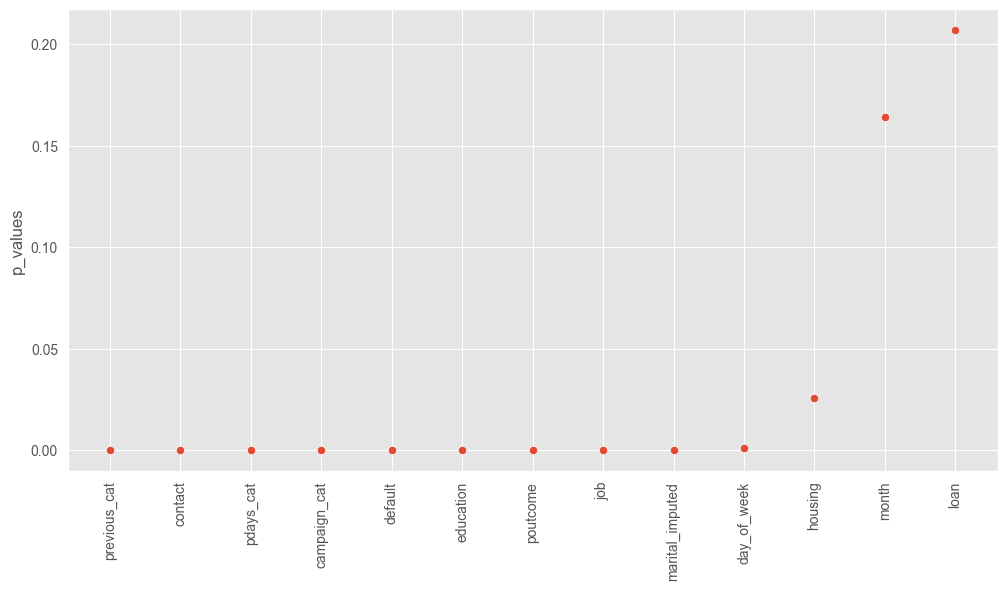

In [357]:
# We will plot the p-values using scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=chi2_scores_df.index, y=chi2_scores_df['p_values'])
plt.xticks(rotation=90)
plt.show()

We will drop the variables with p-values greater than 0.05.

In [358]:
# # Create another list to store the categorical variables with p-values less than 0.05
# cat_cols_selected = []
# for col in chi2_scores_df.index:
#     if chi2_scores_df.loc[col, 'p_values'] < 0.05:
#         cat_cols_selected.append(col)
#
# # We will create a new dataset for the selected categorical variables
# cat_dataset_selected = cat_dataset_encoded[cat_cols_selected]
# cat_dataset_selected.head()

In [360]:
# We will select all the categorical variables except day_of_week, and loan
cat_dataset_selected = cat_dataset_encoded.drop(['day_of_week', 'loan'], axis=1)
cat_dataset_selected.head()

,job,marital_imputed,education,default,housing,contact,month,poutcome,campaign_cat,pdays_cat,previous_cat
0,3,1,0,0,0,1,6,1,0,10,0
1,7,1,3,1,0,1,6,1,0,10,0
2,7,1,3,0,2,1,6,1,0,10,0
3,0,1,1,0,0,1,6,1,0,10,0
4,7,1,3,0,0,1,6,1,0,10,0


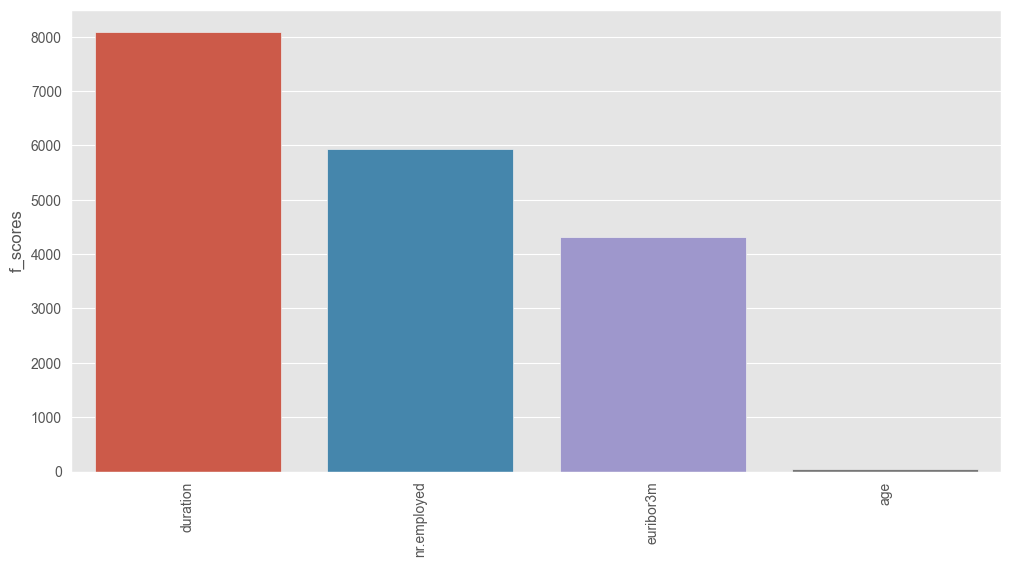

In [361]:
# For numerical variables, we will use the scikit learn f_regression to calculate the f-scores and p-values
from sklearn.feature_selection import f_regression
f_scores = f_regression(num_dataset, target_dataset)

# We will create a dataframe to store the f-scores and p-values
f_scores_df = pd.DataFrame(f_scores[0], index=num_dataset.columns, columns=['f_scores'])
f_scores_df['p_values'] = f_scores[1]
f_scores_df.sort_values(by='f_scores', ascending=False, inplace=True)

# We will plot the f-scores
plt.figure(figsize=(12, 6))
sns.barplot(x=f_scores_df.index, y=f_scores_df['f_scores'])
plt.xticks(rotation=90)
plt.show()

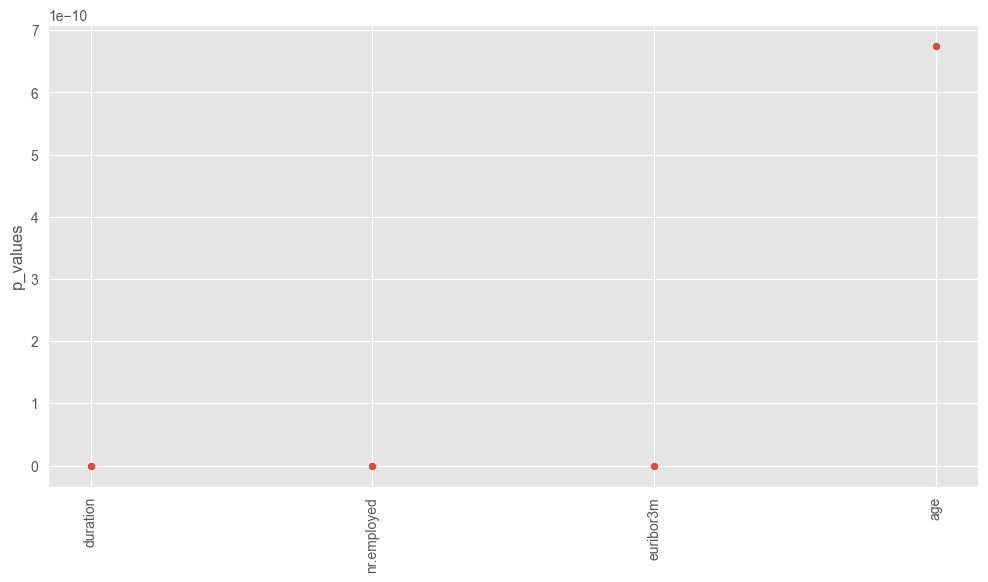

In [362]:
# We will plot the p-values using scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=f_scores_df.index, y=f_scores_df['p_values'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create another list to store the numerical variables with p-values less than 0.05
num_cols_selected = []
for col in f_scores_df.index:
    if f_scores_df.loc[col, 'p_values'] < 0.05:
        num_cols_selected.append(col)

# We will create a new dataset for the selected numerical variables
num_dataset_selected = num_dataset[num_cols_selected]
num_dataset_selected.head()

## Training, Testing, and Validation Datasets
After getting the datasets, the final step is to generate predictor variables and target variables. Convert them into suitable numpy datatype. Then split the dataset into training, testing, and validation datasets.

In [363]:
# For the numerical variables, we will use the sklearn StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = scaler.fit_transform(num_dataset_selected)
X_num.shape

(41185, 4)

In [364]:
# For the categorical variables, we will use the sklearn OneHotEncoder to encode the data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_cat = encoder.fit_transform(cat_dataset_selected).toarray()
X_cat.shape

(41185, 65)

In [365]:
# Then, we will combine the numerical and categorical variables into one dataset, also add one offset column
X = np.concatenate((np.ones((len(X_num), 1)), X_num, X_cat), axis=1)
X.shape

(41185, 70)

In [366]:
# For the target variable, we will convert it into a numpy array
y = target_dataset.values
y.shape

(41185,)

In [388]:
# We will split the dataset into training, testing, and validation datasets
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)
print('Validation dataset shape:', X_val.shape, y_val.shape)

Training dataset shape: (24711, 70) (24711,)
Testing dataset shape: (8237, 70) (8237,)
Validation dataset shape: (8237, 70) (8237,)


In [368]:
# Because we are dealing with the imbalanced dataset, we will use the imblearn SMOTEENN to oversample the minority class and undersample the majority class
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

resampling_model = SMOTEENN(random_state=42)
X_train, y_train = resampling_model.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((39463, 70), (39463,))

In [369]:
# Count the number of each class
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 18146, 1: 21317}

This concludes our data exploration and preparation. In the next section, we will test several machine learning models and choose the best one.

# Machine Learning Model Selection
## Logistic Regression

In [395]:
# First, we will try the logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C=0.1, class_weight='balanced', penalty='l2')
logistic_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = logistic_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = logistic_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     21934
           1       0.44      0.88      0.58      2777

    accuracy                           0.86     24711
   macro avg       0.71      0.87      0.75     24711
weighted avg       0.92      0.86      0.88     24711

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7311
           1       0.45      0.89      0.60       926

    accuracy                           0.87      8237
   macro avg       0.72      0.88      0.76      8237
weighted avg       0.92      0.87      0.88      8237



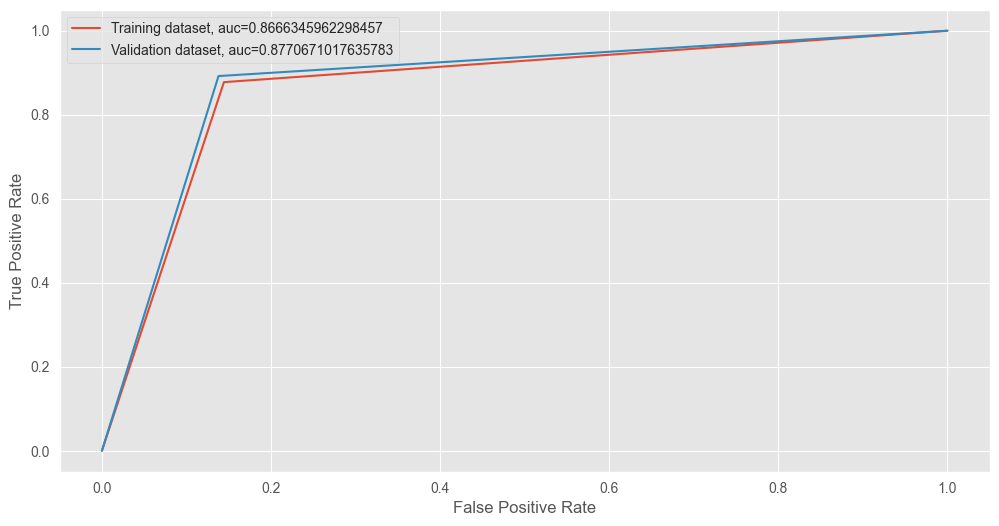

In [396]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [389]:
# Here we will use grid search to find the best parameters for the logistic regression model
logistic_parameters = {'penalty': ['l1', 'l2'],
                       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                       'class_weight': ['balanced', None]}
from sklearn.model_selection import GridSearchCV
logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(logistic_model, logistic_parameters, cv=5, scoring='roc_auc')
logistic_grid.fit(X_train_val, y_train_val)

# Print the best parameters and the corresponding score
print('Best parameters:', logistic_grid.best_params_)
print('Best score:', logistic_grid.best_score_)

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best score: 0.9350702156538512


## Decision Tree

In [392]:
# Next, we will try the decision tree model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7, min_samples_leaf=40, min_samples_split=2)
tree_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = tree_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = tree_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     21934
           1       0.66      0.54      0.60      2777

    accuracy                           0.92     24711
   macro avg       0.80      0.75      0.78     24711
weighted avg       0.91      0.92      0.91     24711

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7311
           1       0.66      0.55      0.60       926

    accuracy                           0.92      8237
   macro avg       0.80      0.76      0.78      8237
weighted avg       0.91      0.92      0.91      8237



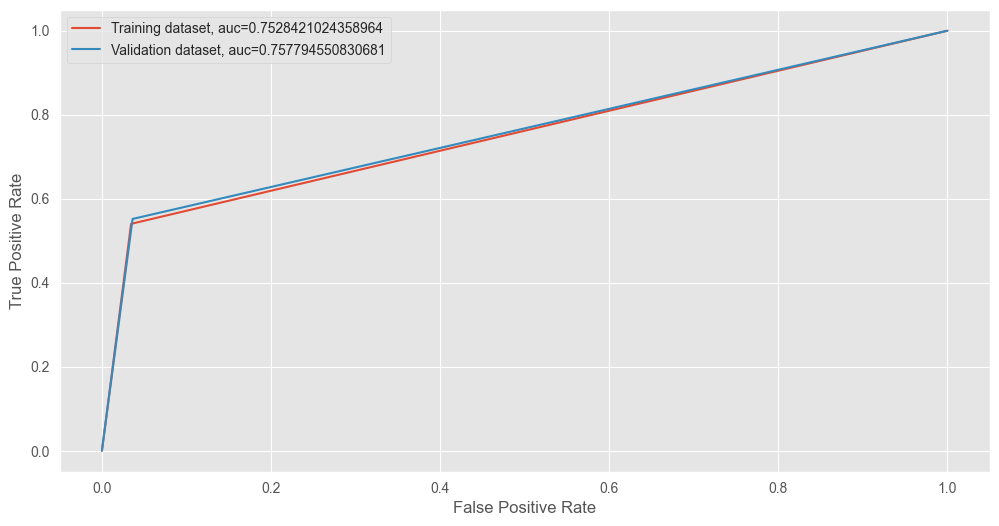

In [393]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# # Plot the decision tree
# from sklearn import tree
# plt.figure(figsize=(12, 6))
# tree.plot_tree(tree_model, filled=True)
# plt.show()

In [391]:
# Here we will use grid search to find the best parameters for the decision tree model
tree_parameters = {'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 1, 4, 7, 10],
                   'class_weight': ['balanced', None],
                   'min_samples_split': [2, 10, 20, 40],
                   'min_samples_leaf': [1, 4, 10, 20, 40, 50]}
from sklearn.model_selection import GridSearchCV
tree_model = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_model, tree_parameters, cv=5, scoring='roc_auc')
tree_grid.fit(X_train_val, y_train_val)

# Print the best parameters and the corresponding score
print('Best parameters:', tree_grid.best_params_)
print('Best score:', tree_grid.best_score_)

Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 2}
Best score: 0.9389886234792248


## Random Forest

In [401]:
# Next, we will try the random forest model
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=None, n_estimators=100)
forest_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = forest_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = forest_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21934
           1       1.00      1.00      1.00      2777

    accuracy                           1.00     24711
   macro avg       1.00      1.00      1.00     24711
weighted avg       1.00      1.00      1.00     24711

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7311
           1       0.66      0.45      0.54       926

    accuracy                           0.91      8237
   macro avg       0.80      0.71      0.75      8237
weighted avg       0.90      0.91      0.91      8237



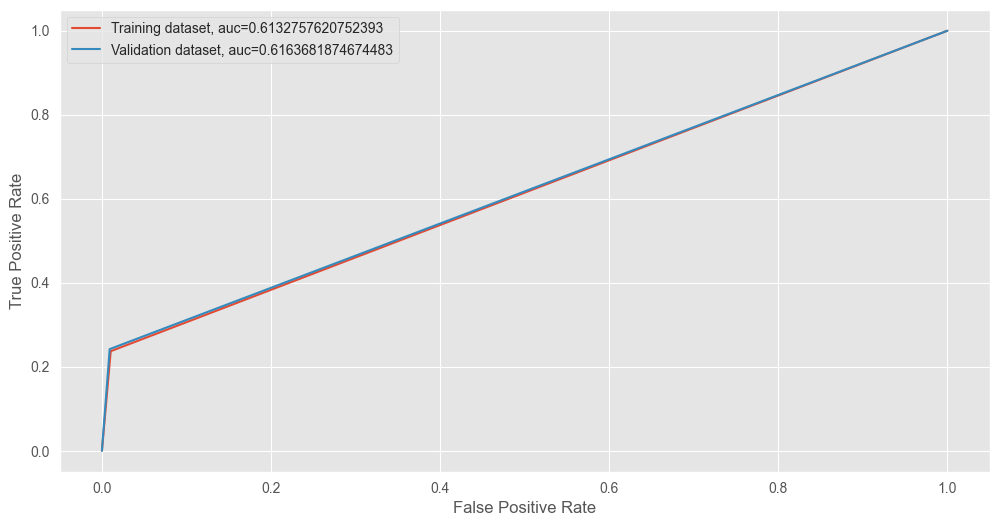

In [399]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Gradient Boosting

In [376]:
# Next, we will try the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = gb_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = gb_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     18146
           1       0.96      0.98      0.97     21317

    accuracy                           0.97     39463
   macro avg       0.97      0.97      0.97     39463
weighted avg       0.97      0.97      0.97     39463

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7311
           1       0.45      0.93      0.60       926

    accuracy                           0.86      8237
   macro avg       0.72      0.89      0.76      8237
weighted avg       0.93      0.86      0.88      8237



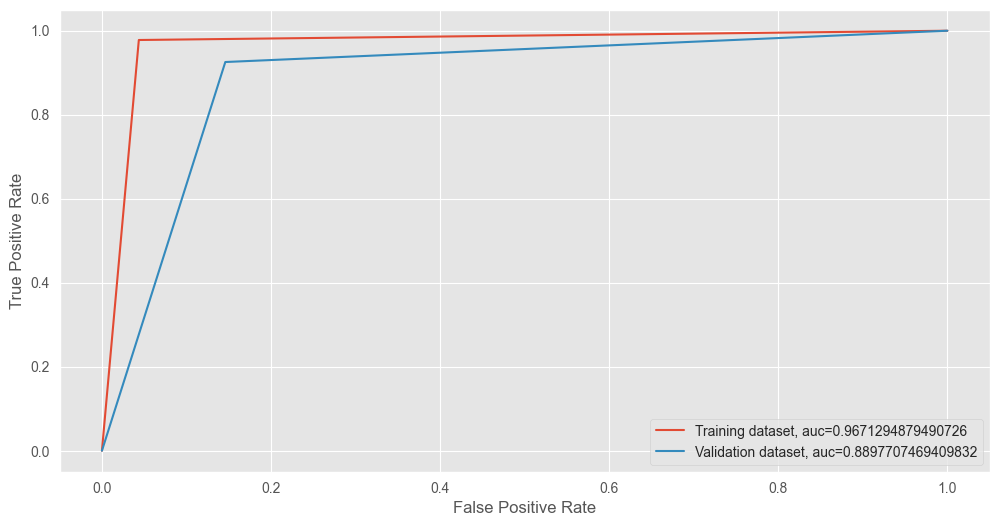

In [377]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## XGBoost

In [378]:
# Next, we will try the XGBoost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = xgb_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = xgb_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18146
           1       1.00      1.00      1.00     21317

    accuracy                           1.00     39463
   macro avg       1.00      1.00      1.00     39463
weighted avg       1.00      1.00      1.00     39463

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7311
           1       0.50      0.85      0.63       926

    accuracy                           0.89      8237
   macro avg       0.74      0.87      0.78      8237
weighted avg       0.92      0.89      0.90      8237



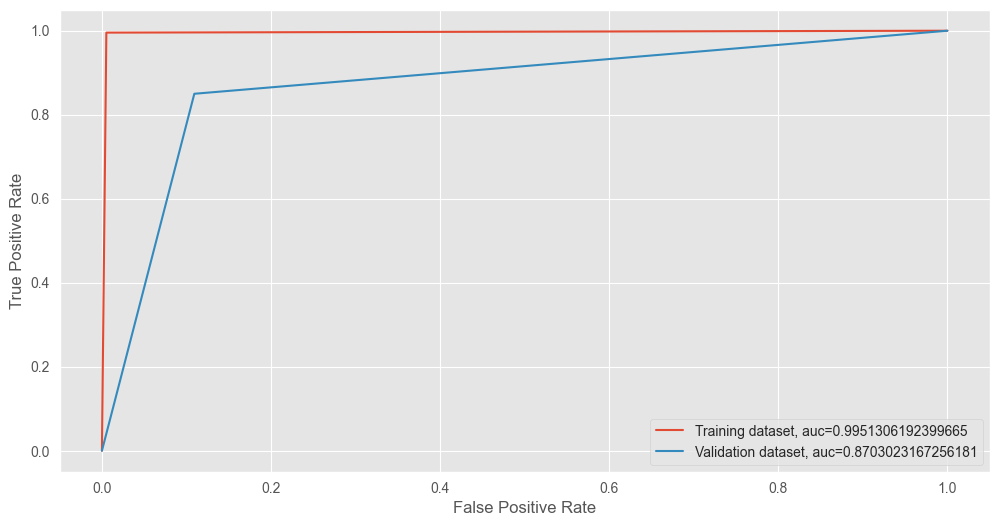

In [379]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Here we will use grid search to find the best parameters for the XGBoost model
xgb_parameters = {'min_child_weight': [1, 5, 10],
                  'gamma': [0.5, 1, 1.5, 2, 5],
                  'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.75, 1.0],
                  'max_depth': [2, 4, 6]}
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, xgb_parameters, cv=5, scoring='roc_auc')
xgb_grid.fit(X_train_val, y_train_val)

# Print the best parameters and the corresponding score
print('Best parameters:', xgb_grid.best_params_)
print('Best score:', xgb_grid.best_score_)

## SVM

In [380]:
# Next, we will try the SVM model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = svm_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = svm_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18146
           1       0.97      0.98      0.98     21317

    accuracy                           0.97     39463
   macro avg       0.97      0.97      0.97     39463
weighted avg       0.97      0.97      0.97     39463

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7311
           1       0.43      0.92      0.58       926

    accuracy                           0.85      8237
   macro avg       0.71      0.88      0.75      8237
weighted avg       0.92      0.85      0.87      8237



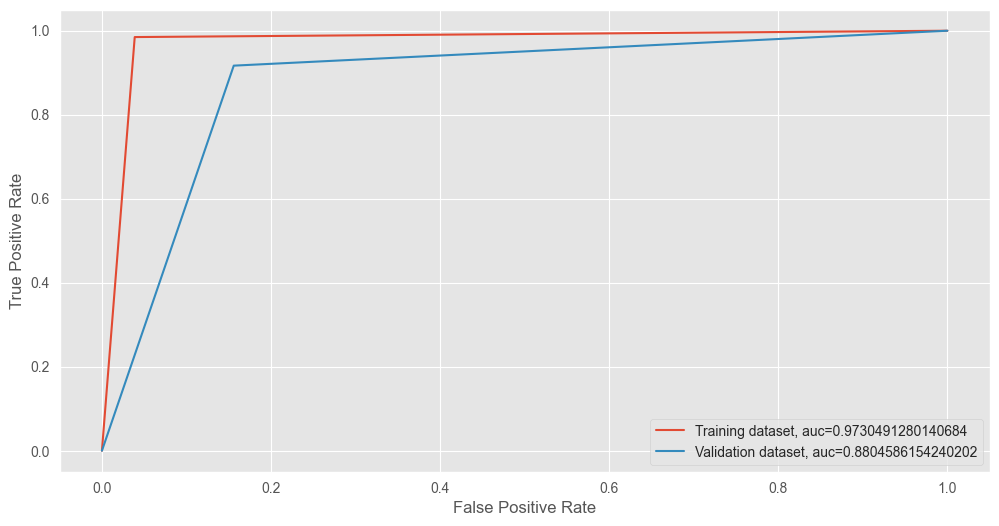

In [381]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Neural Network

In [382]:
# Next, we will try the neural network model
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(500, 200, 100), learning_rate='adaptive', learning_rate_init=0.01, max_iter=3000)
nn_model.fit(X_train, y_train)

# Predict the target variable for the training dataset
y_train_pred = nn_model.predict(X_train)
# Predict the target variable for the validation dataset
y_val_pred = nn_model.predict(X_val)

# Calculate the classification matrices for the training dataset and the validation dataset
from sklearn.metrics import classification_report
print('Training dataset classification report:')
print(classification_report(y_train, y_train_pred))
print('Validation dataset classification report:')
print(classification_report(y_val, y_val_pred))

Training dataset classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18146
           1       1.00      1.00      1.00     21317

    accuracy                           1.00     39463
   macro avg       1.00      1.00      1.00     39463
weighted avg       1.00      1.00      1.00     39463

Validation dataset classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7311
           1       0.45      0.84      0.59       926

    accuracy                           0.87      8237
   macro avg       0.72      0.85      0.75      8237
weighted avg       0.92      0.87      0.88      8237



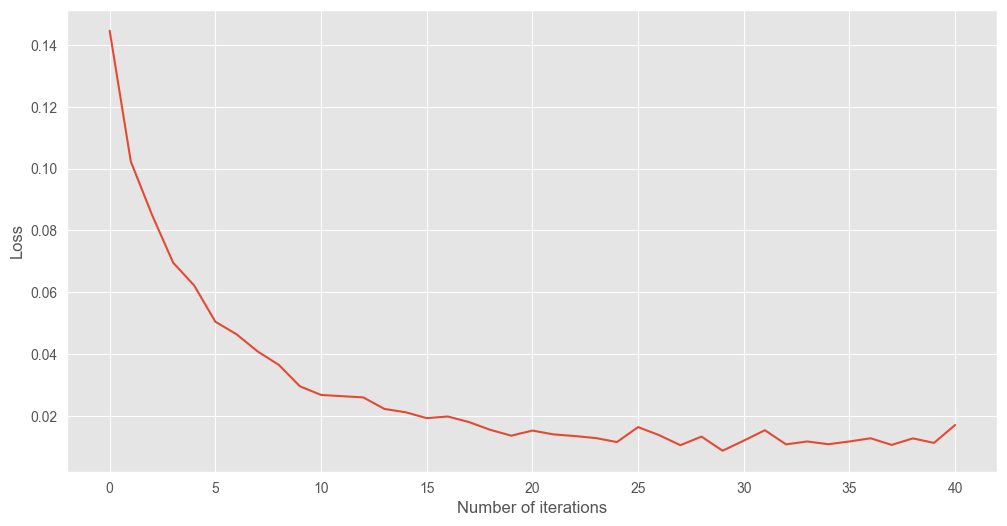

In [383]:
# Plot the loss curve
plt.figure(figsize=(12, 6))
plt.plot(nn_model.loss_curve_)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

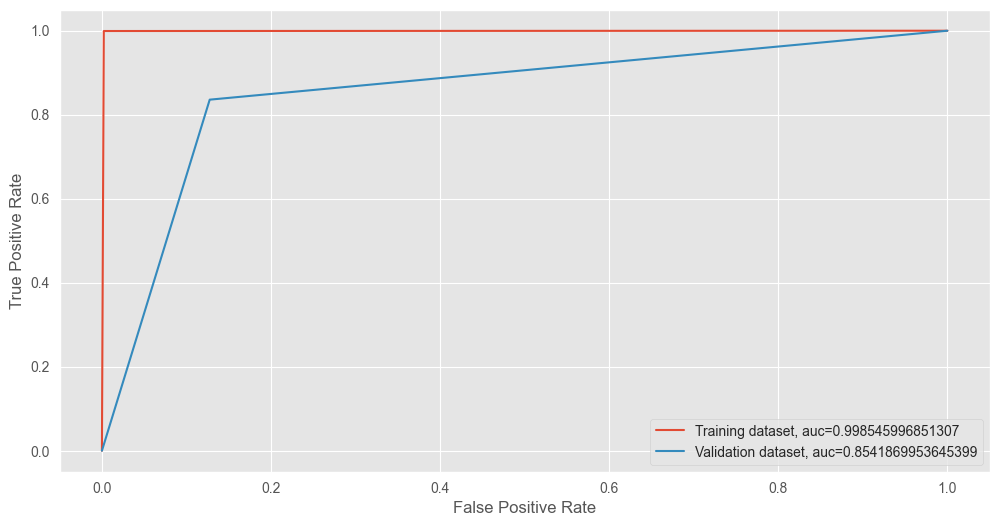

In [384]:
# Calculate the ROC curve and AUC for the training dataset and the validation dataset
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training dataset, auc='+str(auc_train))
plt.plot(fpr_val, tpr_val, label='Validation dataset, auc='+str(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()